<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
#pip install yfinance
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [180]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import seaborn as sns
yf.pdr_override()
y_symbols = ["^TWII"]
from datetime import datetime
startdate = datetime(2010,12,1)
enddate = datetime(2022,12,30)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
print(df.shape)
display(df.head(3))
display(df.tail(3))

[*********************100%***********************]  1 of 1 completed
(2956, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,8430.5996,8520.1104,8428.6396,8520.1104,8520.0781,4202800
2010-12-02,8598.0098,8641.1299,8572.6504,8585.7695,8585.7373,4731800
2010-12-03,8630.8799,8659.6201,8618.2598,8624.0098,8623.9775,3710800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200


# Label triple_barrier

In [181]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)

In [182]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal
Date,,,,,,,
2022-12-02,14933.2002,15021.7305,14921.0596,14970.6797,14970.6797,2999500,-1
2022-12-05,14972.1699,15088.0596,14969.9697,14980.7402,14980.7402,3216700,0
2022-12-06,14955.2900,14957.8203,14728.8799,14728.8799,14728.8799,3221700,0
2022-12-07,14708.0801,14823.1504,14630.0098,14630.0098,14630.0098,3266900,0
2022-12-08,14631.2100,14634.1602,14464.2002,14553.0400,14553.0400,2428500,0
2022-12-09,14620.2695,14742.7900,14620.2695,14705.4297,14705.4297,2543200,0
2022-12-12,14658.4600,14658.4600,14538.6602,14612.5898,14612.5898,2221600,0
2022-12-13,14617.8604,14658.7002,14515.7402,14522.9600,14522.9600,2730600,0
2022-12-14,14557.5596,14739.3604,14557.5596,14739.3604,14739.3604,2640200,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


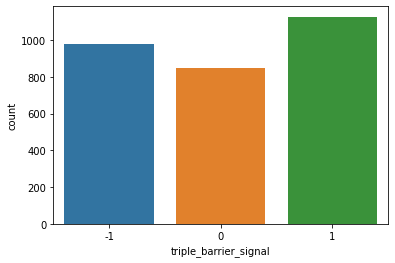

In [183]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

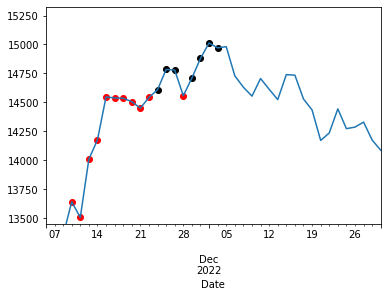

In [184]:
import matplotlib.pyplot as plt
buy = df[df['triple_barrier_signal']==1]['Close']
sell = df[df['triple_barrier_signal']==-1]['Close']
df['Close'][-40:].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
lb = df['Close'][-40:].mean() - 2*df['Close'][-40:].std()
ub = df['Close'][-40:].mean() + 2*df['Close'][-40:].std()
plt.ylim(lb,ub)
plt.show()

# 建立ohlcv

In [185]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count   2955.0000
mean      53.1371
std       12.6405
min        9.9482
25%       44.2815
50%       53.9690
75%       61.8662
max      100.0000
Name: RSI, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346


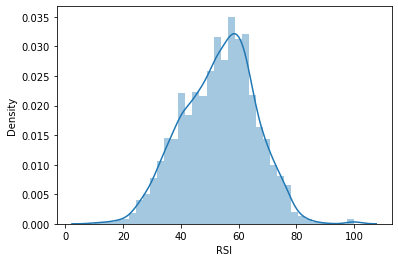

In [186]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count   2943.0000
mean     -41.6623
std       31.7513
min     -100.0000
25%      -70.1499
50%      -36.0510
75%      -12.4631
max       -0.0000
Name: Williams %R, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551


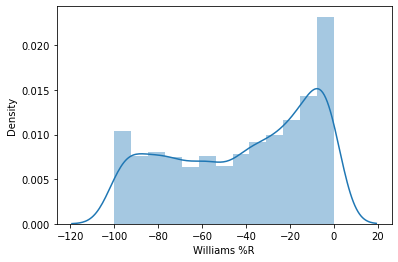

In [187]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count    2916.0000
mean    10524.8963
std      2937.9191
min      7003.6941
25%      8436.5167
50%      9598.7950
75%     10919.1936
max     18134.3023
Name: SMA, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068


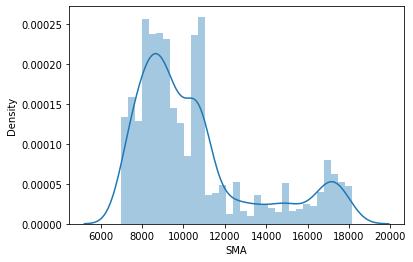

In [188]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count    2956.0000
mean    10532.2799
std      2947.4375
min      6806.5117
25%      8477.4300
50%      9593.4953
75%     11097.4647
max     18370.1916
Name: EMA, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125


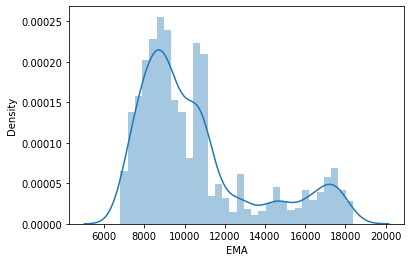

In [189]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count    2948.0000
mean    10540.0679
std      2952.8882
min      6776.1840
25%      8464.1685
50%      9594.7292
75%     11134.8863
max     18389.1466
Name: WMA, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501


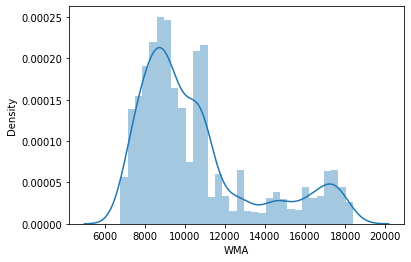

In [190]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count    2938.0000
mean    10549.9557
std      2962.5497
min      6715.3964
25%      8454.2025
50%      9594.6211
75%     11187.8212
max     18487.9532
Name: HMA, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734


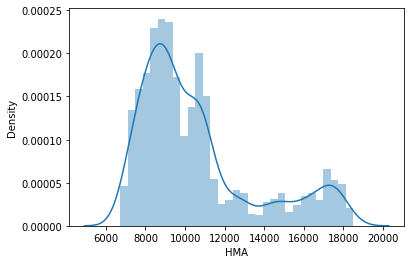

In [191]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count    2956.0000
mean    10540.0184
std      2955.8942
min      6661.1027
25%      8474.5761
50%      9573.2439
75%     11161.5749
max     18516.7710
Name: TEMA, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790


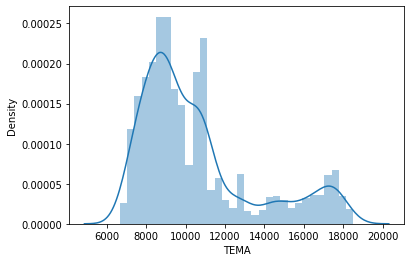

In [192]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count   2955.0000
mean      17.3007
std      112.5232
min     -367.4168
25%      -68.2137
50%       38.3571
75%      101.5356
max      347.4393
Name: CCI, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083


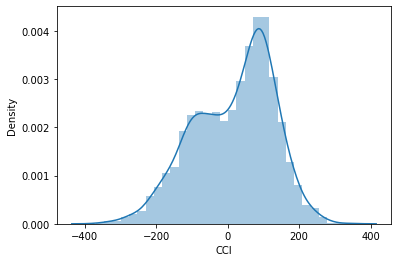

In [193]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count   2955.0000
mean       6.7913
std       29.7090
min      -86.4642
25%      -14.0070
50%        9.6501
75%       27.5922
max      100.0000
Name: CMO, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112


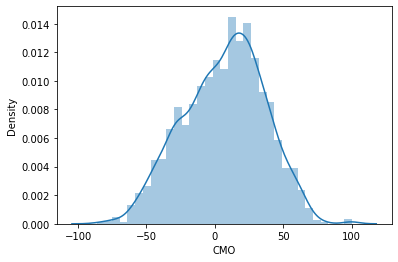

In [194]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count   2956.0000
mean       0.0516
std       39.4709
min     -244.0728
25%      -19.6648
50%        0.5063
75%       20.4447
max      214.8022
Name: MACD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729


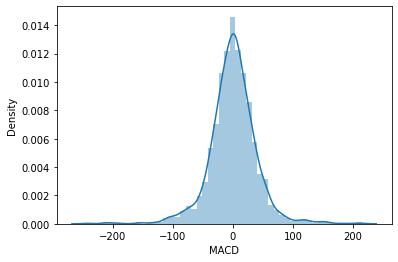

In [195]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count   2956.0000
mean       0.0003
std        0.3515
min       -2.3559
25%       -0.2060
50%        0.0007
75%        0.2027
max        1.5929
Name: PPO, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460


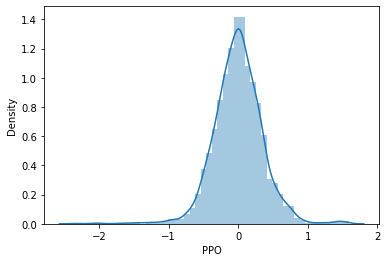

In [196]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count   2944.0000
mean       0.2680
std        3.5219
min      -23.3620
25%       -1.6866
50%        0.5811
75%        2.4895
max       16.7731
Name: ROC, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155


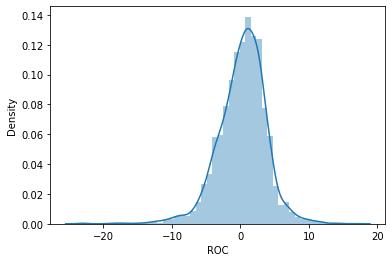

In [197]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count          2947.0000
mean     2454245359.9014
std      5378975058.0555
min     -6487265871.6930
25%      -377358024.9805
50%      1475979786.0887
75%      3405907734.7332
max     26567276530.1988
Name: CFI, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710


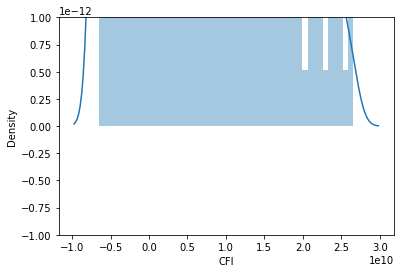

In [198]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count   2943.0000
mean      -0.9262
std       17.4258
min     -102.6679
25%      -12.5287
50%        0.3387
75%       10.8868
max       46.9316
Name: DMI, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,...,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526,-9.3782
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,...,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101,-8.7084
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,...,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329,-3.6196
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,...,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626,-11.0510
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,...,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710,-15.8038


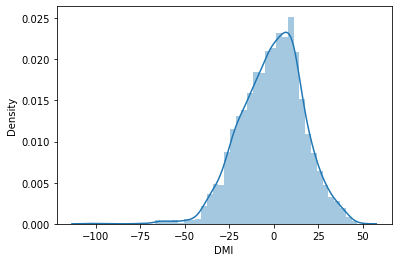

In [199]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count    2956.0000
mean    10501.8066
std      2948.2885
min      6609.1099
25%      8452.5440
50%      9536.8631
75%     11138.0303
max     18619.6094
Name: SAR, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,0,45.9325,-85.7920,14231.4500,...,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526,-9.3782,14731.2546
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,0,46.3362,-80.8859,14267.9551,...,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101,-8.7084,14673.9281
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,0,47.6854,-71.5170,14301.5814,...,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329,-3.6196,14622.3344
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,0,43.4638,-91.5553,14329.2860,...,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626,-11.0510,14575.8999
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,...,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710,-15.8038,14521.1079


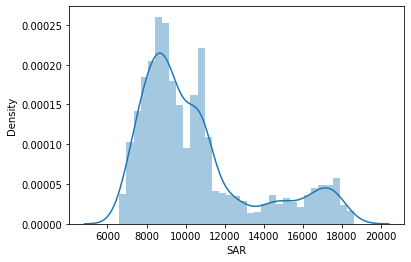

In [200]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [201]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #取15個剛剛建立的技術指標當特徵
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2956, 22)
(2916, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-12-23,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526,-9.3782,14731.2546,0
2022-12-26,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101,-8.7084,14673.9281,0
2022-12-27,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329,-3.6196,14622.3344,0
2022-12-28,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626,-11.0510,14575.8999,0
2022-12-29,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710,-15.8038,14521.1079,0


# 相關性分析

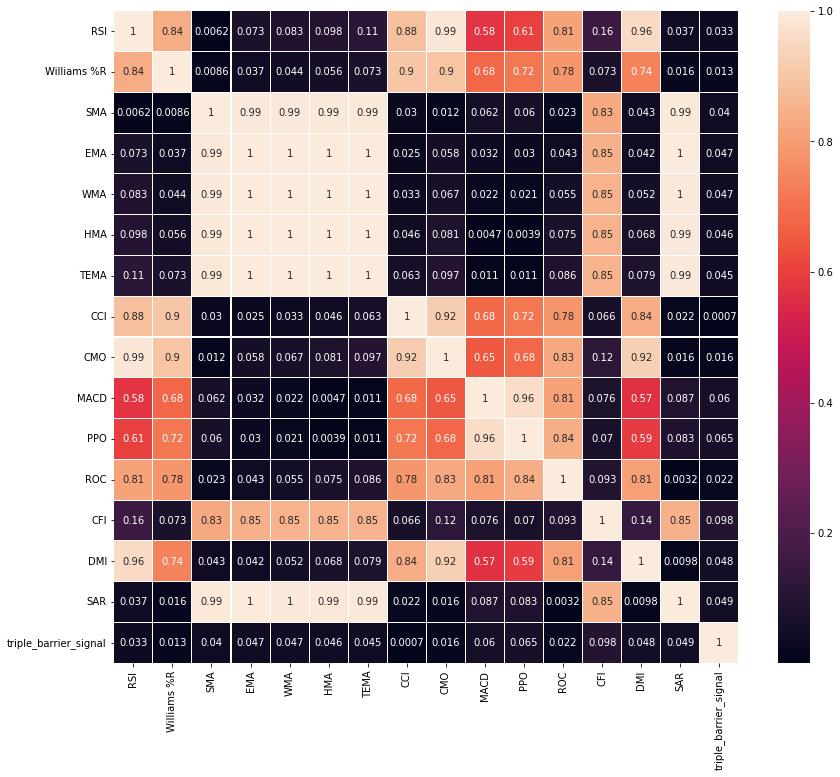

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [203]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,index = df.index,columns = df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-12-23,0.4844,0.1421,0.6494,0.6586,0.6548,0.6433,0.6394,0.3285,0.4303,0.3363,0.4387,0.5210,0.2231,0.5323,0.6763,0
2022-12-26,0.4899,0.1911,0.6526,0.6562,0.6519,0.6401,0.6383,0.3577,0.4378,0.3475,0.4478,0.5362,0.2205,0.5379,0.6715,0
2022-12-27,0.5080,0.2848,0.6557,0.6551,0.6503,0.6382,0.6400,0.4039,0.4630,0.3682,0.4645,0.5182,0.2189,0.5801,0.6672,0
2022-12-28,0.4512,0.0844,0.6581,0.6515,0.6467,0.6360,0.6350,0.3479,0.3939,0.3665,0.4632,0.5071,0.2159,0.5184,0.6633,0
2022-12-29,0.4212,0.1334,0.6603,0.6471,0.6426,0.6331,0.6286,0.3174,0.3588,0.3607,0.4584,0.5069,0.2125,0.4789,0.6588,0


In [204]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [205]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2902/2902 [00:04<00:00, 636.37it/s]

準備完成


# check

In [206]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2902
第一筆的index開始和結束:2011-01-26-2011-02-23
最後一筆的index開始和結束:2022-12-09-2022-12-29


# Reshape X

(圖片數量,長,寬,1張)

In [207]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2902, 15, 15)
(2902, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [208]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(2902, 1)
[[-1]
 [-1]
 [-1]
 [-1]
 [-1]]
(2902, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Visualization

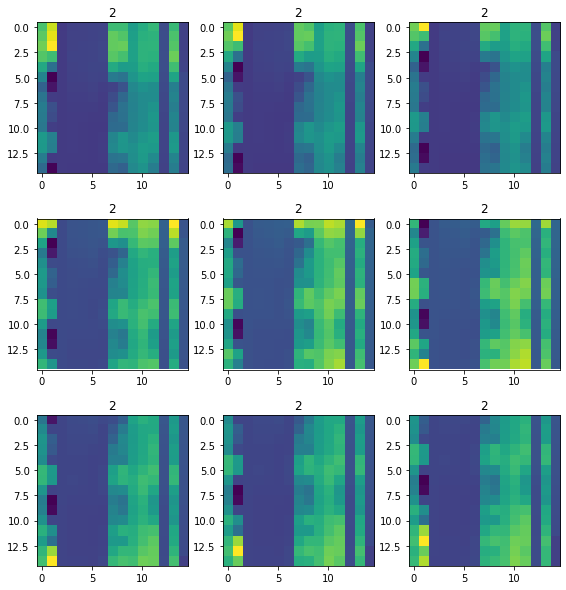

In [209]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [210]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2862, 15, 15, 1) (2862, 3) (40, 15, 15, 1)


# 調整採樣

In [211]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2862, 225)
(2862,)
0    815
1    815
2    815
Name: 0, dtype: int64
(2445, 15, 15, 1)
(2445, 3)


# Split training and val sets

In [212]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1956, 15, 15, 1) (1956, 3) (489, 15, 15, 1) (489, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [213]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    1113
2     955
0     834
dtype: int64

In [214]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    815
1    815
2    815
dtype: int64

In [215]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

0    652
1    652
2    652
dtype: int64

In [216]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

2    163
0    163
1    163
dtype: int64

# CNN

In [217]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [218]:
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 15, 15, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dropout_9 (Dropout)         (None, 576)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               73856     
                                                      

In [219]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [220]:
#1
lr_reduction = ReduceLROnPlateau(
    monitor = 'val_acc', 
    factor=0.5, 
    patience = 3, 
    verbose = 1, 
    min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [221]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 500,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/500
16/16 [==============================] - ETA: 0s - loss: 1.1046 - accuracy: 0.3119

16/16 [==============================] - 2s 40ms/step - loss: 1.1046 - accuracy: 0.3119 - val_loss: 1.0968 - val_accuracy: 0.4458
Epoch 2/500
14/16 [=========================>....] - ETA: 0s - loss: 1.0985 - accuracy: 0.3460

16/16 [==============================] - 0s 13ms/step - loss: 1.0987 - accuracy: 0.3446 - val_loss: 1.0945 - val_accuracy: 0.4172
Epoch 3/500
14/16 [=========================>....] - ETA: 0s - loss: 1.0954 - accuracy: 0.3538

16/16 [==============================] - 0s 12ms/step - loss: 1.0948 - accuracy: 0.3609 - val_loss: 1.0890 - val_accuracy: 0.4438
Epoch 4/500
 9/16 [===============>..............] - ETA: 0s - loss: 1.0904 - accuracy: 0.3906

16/16 [==============================] - 0s 11ms/step - loss: 1.0889 - accuracy: 0.3937 - val_loss: 1.0800 - val_accuracy: 0.4029
Epoch 5/500
14/16 [=========================>....] - ETA: 0s - loss: 1.0796 - accuracy: 0.4007

16/16 [==============================] - 0s 11ms/step - loss: 1.0790 - accuracy: 0.3993 - val_loss: 1.0560 - val_accuracy: 0.4335
Epoch 6/500
14/16 [=========================>....] - ETA: 0s - loss: 1.0644 - accuracy: 0.4275

16/16 [==============================] - 0s 12ms/step - loss: 1.0664 - accuracy: 0.4243 - val_loss: 1.0452 - val_accuracy: 0.4642
Epoch 7/500
15/16 [===========================>..] - ETA: 0s - loss: 1.0574 - accuracy: 0.4344

16/16 [==============================] - 0s 11ms/step - loss: 1.0575 - accuracy: 0.4340 - val_loss: 1.0349 - val_accuracy: 0.4479
Epoch 8/500
15/16 [===========================>..] - ETA: 0s - loss: 1.0481 - accuracy: 0.4260

16/16 [==============================] - 0s 11ms/step - loss: 1.0488 - accuracy: 0.4259 - val_loss: 1.0279 - val_accuracy: 0.4826
Epoch 9/500
 9/16 [===============>..............] - ETA: 0s - loss: 1.0400 - accuracy: 0.4557

16/16 [==============================] - 0s 10ms/step - loss: 1.0344 - accuracy: 0.4760 - val_loss: 1.0174 - val_accuracy: 0.4765
Epoch 10/500
10/16 [=================>............] - ETA: 0s - loss: 1.0313 - accuracy: 0.4578

16/16 [==============================] - 0s 9ms/step - loss: 1.0297 - accuracy: 0.4565 - val_loss: 1.0126 - val_accuracy: 0.5153
Epoch 11/500
10/16 [=================>............] - ETA: 0s - loss: 1.0261 - accuracy: 0.4672

16/16 [==============================] - 0s 8ms/step - loss: 1.0286 - accuracy: 0.4668 - val_loss: 1.0299 - val_accuracy: 0.4642
Epoch 12/500
11/16 [===================>..........] - ETA: 0s - loss: 1.0242 - accuracy: 0.4695

16/16 [==============================] - 0s 8ms/step - loss: 1.0187 - accuracy: 0.4719 - val_loss: 1.0095 - val_accuracy: 0.4888
Epoch 13/500
 9/16 [===============>..............] - ETA: 0s - loss: 1.0259 - accuracy: 0.4670

16/16 [==============================] - 0s 8ms/step - loss: 1.0200 - accuracy: 0.4760 - val_loss: 1.0088 - val_accuracy: 0.5010
Epoch 14/500
10/16 [=================>............] - ETA: 0s - loss: 1.0065 - accuracy: 0.4906

16/16 [==============================] - 0s 9ms/step - loss: 1.0133 - accuracy: 0.4826 - val_loss: 1.0015 - val_accuracy: 0.4949
Epoch 15/500
10/16 [=================>............] - ETA: 0s - loss: 1.0175 - accuracy: 0.4883

16/16 [==============================] - 0s 8ms/step - loss: 1.0198 - accuracy: 0.4821 - val_loss: 1.0066 - val_accuracy: 0.5010
Epoch 16/500
 9/16 [===============>..............] - ETA: 0s - loss: 1.0308 - accuracy: 0.4557

16/16 [==============================] - 0s 9ms/step - loss: 1.0197 - accuracy: 0.4683 - val_loss: 1.0065 - val_accuracy: 0.5051
Epoch 17/500
10/16 [=================>............] - ETA: 0s - loss: 1.0109 - accuracy: 0.5000

16/16 [==============================] - 0s 8ms/step - loss: 1.0082 - accuracy: 0.4949 - val_loss: 1.0005 - val_accuracy: 0.5031
Epoch 18/500
10/16 [=================>............] - ETA: 0s - loss: 1.0133 - accuracy: 0.4719

16/16 [==============================] - 0s 8ms/step - loss: 1.0046 - accuracy: 0.4811 - val_loss: 1.0002 - val_accuracy: 0.5051
Epoch 19/500
11/16 [===================>..........] - ETA: 0s - loss: 1.0064 - accuracy: 0.4886

16/16 [==============================] - 0s 9ms/step - loss: 1.0027 - accuracy: 0.4923 - val_loss: 1.0061 - val_accuracy: 0.4969
Epoch 20/500
10/16 [=================>............] - ETA: 0s - loss: 1.0074 - accuracy: 0.4867

16/16 [==============================] - 0s 8ms/step - loss: 1.0003 - accuracy: 0.4857 - val_loss: 0.9984 - val_accuracy: 0.4928
Epoch 21/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9911 - accuracy: 0.4861

16/16 [==============================] - 0s 8ms/step - loss: 1.0030 - accuracy: 0.4790 - val_loss: 0.9972 - val_accuracy: 0.4990
Epoch 22/500
10/16 [=================>............] - ETA: 0s - loss: 0.9947 - accuracy: 0.4805

16/16 [==============================] - 0s 9ms/step - loss: 1.0012 - accuracy: 0.4755 - val_loss: 0.9986 - val_accuracy: 0.5112
Epoch 23/500
10/16 [=================>............] - ETA: 0s - loss: 0.9838 - accuracy: 0.5180

16/16 [==============================] - 0s 9ms/step - loss: 0.9903 - accuracy: 0.5143 - val_loss: 0.9954 - val_accuracy: 0.4928
Epoch 24/500
10/16 [=================>............] - ETA: 0s - loss: 0.9940 - accuracy: 0.5016

16/16 [==============================] - 0s 8ms/step - loss: 1.0022 - accuracy: 0.4928 - val_loss: 1.0007 - val_accuracy: 0.4969
Epoch 25/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9937 - accuracy: 0.4965

16/16 [==============================] - 0s 8ms/step - loss: 0.9937 - accuracy: 0.5036 - val_loss: 0.9944 - val_accuracy: 0.5092
Epoch 26/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9973 - accuracy: 0.4986

16/16 [==============================] - 0s 8ms/step - loss: 0.9905 - accuracy: 0.4990 - val_loss: 0.9888 - val_accuracy: 0.5072
Epoch 27/500
10/16 [=================>............] - ETA: 0s - loss: 0.9889 - accuracy: 0.4961

16/16 [==============================] - 0s 8ms/step - loss: 0.9875 - accuracy: 0.5000 - val_loss: 0.9911 - val_accuracy: 0.5072
Epoch 28/500
 9/16 [===============>..............] - ETA: 0s - loss: 1.0047 - accuracy: 0.4705

16/16 [==============================] - 0s 9ms/step - loss: 0.9961 - accuracy: 0.4821 - val_loss: 0.9959 - val_accuracy: 0.4928
Epoch 29/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9981 - accuracy: 0.4818

16/16 [==============================] - 0s 8ms/step - loss: 0.9977 - accuracy: 0.4903 - val_loss: 1.0014 - val_accuracy: 0.4908
Epoch 30/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9850 - accuracy: 0.4936

16/16 [==============================] - 0s 9ms/step - loss: 0.9896 - accuracy: 0.4908 - val_loss: 0.9894 - val_accuracy: 0.4990
Epoch 31/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9951 - accuracy: 0.4929

16/16 [==============================] - 0s 8ms/step - loss: 0.9875 - accuracy: 0.5046 - val_loss: 0.9899 - val_accuracy: 0.4888
Epoch 32/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9785 - accuracy: 0.5050

16/16 [==============================] - 0s 9ms/step - loss: 0.9770 - accuracy: 0.5077 - val_loss: 0.9888 - val_accuracy: 0.5072
Epoch 33/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9835 - accuracy: 0.4993

16/16 [==============================] - 0s 7ms/step - loss: 0.9837 - accuracy: 0.5041 - val_loss: 0.9851 - val_accuracy: 0.4949
Epoch 34/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.9928 - accuracy: 0.4893

16/16 [==============================] - 0s 8ms/step - loss: 0.9736 - accuracy: 0.5051 - val_loss: 0.9834 - val_accuracy: 0.5112
Epoch 35/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9764 - accuracy: 0.5249

16/16 [==============================] - 0s 8ms/step - loss: 0.9767 - accuracy: 0.5143 - val_loss: 0.9847 - val_accuracy: 0.4928
Epoch 36/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9768 - accuracy: 0.4993

16/16 [==============================] - 0s 8ms/step - loss: 0.9784 - accuracy: 0.4985 - val_loss: 0.9840 - val_accuracy: 0.5092
Epoch 37/500
10/16 [=================>............] - ETA: 0s - loss: 0.9740 - accuracy: 0.5070

16/16 [==============================] - 0s 9ms/step - loss: 0.9746 - accuracy: 0.5204 - val_loss: 0.9828 - val_accuracy: 0.5092
Epoch 38/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9680 - accuracy: 0.5121

16/16 [==============================] - 0s 8ms/step - loss: 0.9651 - accuracy: 0.5087 - val_loss: 0.9808 - val_accuracy: 0.4928
Epoch 39/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9579 - accuracy: 0.5249

16/16 [==============================] - 0s 7ms/step - loss: 0.9674 - accuracy: 0.5148 - val_loss: 0.9770 - val_accuracy: 0.4969
Epoch 40/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9730 - accuracy: 0.5130

16/16 [==============================] - 0s 8ms/step - loss: 0.9711 - accuracy: 0.5046 - val_loss: 0.9761 - val_accuracy: 0.4969
Epoch 41/500
16/16 [==============================] - ETA: 0s - loss: 0.9705 - accuracy: 0.5220

16/16 [==============================] - 0s 10ms/step - loss: 0.9705 - accuracy: 0.5220 - val_loss: 0.9865 - val_accuracy: 0.5031
Epoch 42/500
10/16 [=================>............] - ETA: 0s - loss: 0.9825 - accuracy: 0.5055

16/16 [==============================] - 0s 7ms/step - loss: 0.9713 - accuracy: 0.5153 - val_loss: 0.9800 - val_accuracy: 0.5072
Epoch 43/500
10/16 [=================>............] - ETA: 0s - loss: 0.9572 - accuracy: 0.5320

16/16 [==============================] - 0s 8ms/step - loss: 0.9713 - accuracy: 0.5128 - val_loss: 0.9773 - val_accuracy: 0.5072
Epoch 44/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9619 - accuracy: 0.5208

16/16 [==============================] - 0s 9ms/step - loss: 0.9632 - accuracy: 0.5230 - val_loss: 0.9751 - val_accuracy: 0.4990
Epoch 45/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9663 - accuracy: 0.5382

16/16 [==============================] - 0s 9ms/step - loss: 0.9672 - accuracy: 0.5256 - val_loss: 0.9753 - val_accuracy: 0.4969
Epoch 46/500
10/16 [=================>............] - ETA: 0s - loss: 0.9482 - accuracy: 0.5273

16/16 [==============================] - 0s 9ms/step - loss: 0.9568 - accuracy: 0.5291 - val_loss: 0.9771 - val_accuracy: 0.4928
Epoch 47/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9649 - accuracy: 0.5148

16/16 [==============================] - 0s 8ms/step - loss: 0.9559 - accuracy: 0.5158 - val_loss: 0.9907 - val_accuracy: 0.5112
Epoch 48/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9687 - accuracy: 0.5085

16/16 [==============================] - 0s 8ms/step - loss: 0.9641 - accuracy: 0.5112 - val_loss: 0.9708 - val_accuracy: 0.5133
Epoch 49/500
10/16 [=================>............] - ETA: 0s - loss: 0.9501 - accuracy: 0.5391

16/16 [==============================] - 0s 9ms/step - loss: 0.9516 - accuracy: 0.5337 - val_loss: 0.9710 - val_accuracy: 0.5092
Epoch 50/500
10/16 [=================>............] - ETA: 0s - loss: 0.9288 - accuracy: 0.5508

16/16 [==============================] - 0s 8ms/step - loss: 0.9491 - accuracy: 0.5297 - val_loss: 0.9745 - val_accuracy: 0.5133
Epoch 51/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9553 - accuracy: 0.5206

16/16 [==============================] - 0s 8ms/step - loss: 0.9484 - accuracy: 0.5276 - val_loss: 0.9683 - val_accuracy: 0.5031
Epoch 52/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9497 - accuracy: 0.5220

16/16 [==============================] - 0s 8ms/step - loss: 0.9536 - accuracy: 0.5230 - val_loss: 0.9685 - val_accuracy: 0.5194
Epoch 53/500
10/16 [=================>............] - ETA: 0s - loss: 0.9436 - accuracy: 0.5414

16/16 [==============================] - 0s 9ms/step - loss: 0.9466 - accuracy: 0.5363 - val_loss: 0.9643 - val_accuracy: 0.5031
Epoch 54/500
10/16 [=================>............] - ETA: 0s - loss: 0.9369 - accuracy: 0.5430

16/16 [==============================] - 0s 9ms/step - loss: 0.9403 - accuracy: 0.5383 - val_loss: 0.9669 - val_accuracy: 0.5215
Epoch 55/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9541 - accuracy: 0.5178

16/16 [==============================] - 0s 8ms/step - loss: 0.9475 - accuracy: 0.5266 - val_loss: 0.9781 - val_accuracy: 0.5256
Epoch 56/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9431 - accuracy: 0.5330

16/16 [==============================] - 0s 9ms/step - loss: 0.9456 - accuracy: 0.5291 - val_loss: 0.9715 - val_accuracy: 0.5153
Epoch 57/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9454 - accuracy: 0.5362

16/16 [==============================] - 0s 8ms/step - loss: 0.9464 - accuracy: 0.5429 - val_loss: 0.9616 - val_accuracy: 0.5133
Epoch 58/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.9320 - accuracy: 0.5339

16/16 [==============================] - 0s 9ms/step - loss: 0.9374 - accuracy: 0.5281 - val_loss: 0.9654 - val_accuracy: 0.5215
Epoch 59/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9241 - accuracy: 0.5554

16/16 [==============================] - 0s 9ms/step - loss: 0.9288 - accuracy: 0.5414 - val_loss: 0.9578 - val_accuracy: 0.5276
Epoch 60/500
10/16 [=================>............] - ETA: 0s - loss: 0.9442 - accuracy: 0.5367

16/16 [==============================] - 0s 8ms/step - loss: 0.9370 - accuracy: 0.5281 - val_loss: 0.9699 - val_accuracy: 0.5174
Epoch 61/500
10/16 [=================>............] - ETA: 0s - loss: 0.9256 - accuracy: 0.5469

16/16 [==============================] - 0s 8ms/step - loss: 0.9327 - accuracy: 0.5445 - val_loss: 0.9667 - val_accuracy: 0.5378
Epoch 62/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9205 - accuracy: 0.5462

16/16 [==============================] - 0s 8ms/step - loss: 0.9175 - accuracy: 0.5496 - val_loss: 0.9603 - val_accuracy: 0.5072
Epoch 63/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9346 - accuracy: 0.5291

16/16 [==============================] - 0s 8ms/step - loss: 0.9295 - accuracy: 0.5373 - val_loss: 0.9543 - val_accuracy: 0.5276
Epoch 64/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9279 - accuracy: 0.5384

16/16 [==============================] - 0s 8ms/step - loss: 0.9219 - accuracy: 0.5450 - val_loss: 0.9569 - val_accuracy: 0.5337
Epoch 65/500
10/16 [=================>............] - ETA: 0s - loss: 0.9106 - accuracy: 0.5734

16/16 [==============================] - 0s 8ms/step - loss: 0.9089 - accuracy: 0.5624 - val_loss: 0.9654 - val_accuracy: 0.5235
Epoch 66/500
10/16 [=================>............] - ETA: 0s - loss: 0.9076 - accuracy: 0.5656

16/16 [==============================] - 0s 8ms/step - loss: 0.9201 - accuracy: 0.5552 - val_loss: 0.9535 - val_accuracy: 0.5297
Epoch 67/500
10/16 [=================>............] - ETA: 0s - loss: 0.9268 - accuracy: 0.5391

16/16 [==============================] - 0s 8ms/step - loss: 0.9174 - accuracy: 0.5496 - val_loss: 0.9523 - val_accuracy: 0.5378
Epoch 68/500
10/16 [=================>............] - ETA: 0s - loss: 0.8949 - accuracy: 0.5781

16/16 [==============================] - 0s 9ms/step - loss: 0.9062 - accuracy: 0.5608 - val_loss: 0.9536 - val_accuracy: 0.5256
Epoch 69/500
10/16 [=================>............] - ETA: 0s - loss: 0.9034 - accuracy: 0.5672

16/16 [==============================] - 0s 8ms/step - loss: 0.9108 - accuracy: 0.5721 - val_loss: 0.9524 - val_accuracy: 0.5542
Epoch 70/500
10/16 [=================>............] - ETA: 0s - loss: 0.8984 - accuracy: 0.5656

16/16 [==============================] - 0s 8ms/step - loss: 0.8978 - accuracy: 0.5695 - val_loss: 0.9472 - val_accuracy: 0.5501
Epoch 71/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8910 - accuracy: 0.5724

16/16 [==============================] - 0s 9ms/step - loss: 0.9044 - accuracy: 0.5588 - val_loss: 0.9688 - val_accuracy: 0.5460
Epoch 72/500
11/16 [===================>..........] - ETA: 0s - loss: 0.9057 - accuracy: 0.5554

16/16 [==============================] - 0s 8ms/step - loss: 0.9097 - accuracy: 0.5532 - val_loss: 0.9496 - val_accuracy: 0.5378
Epoch 73/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.8867 - accuracy: 0.5781

16/16 [==============================] - 0s 8ms/step - loss: 0.8896 - accuracy: 0.5736 - val_loss: 0.9365 - val_accuracy: 0.5644
Epoch 74/500
10/16 [=================>............] - ETA: 0s - loss: 0.9017 - accuracy: 0.5625

16/16 [==============================] - 0s 9ms/step - loss: 0.8946 - accuracy: 0.5583 - val_loss: 0.9366 - val_accuracy: 0.5706
Epoch 75/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8887 - accuracy: 0.5689

16/16 [==============================] - 0s 8ms/step - loss: 0.8975 - accuracy: 0.5634 - val_loss: 0.9245 - val_accuracy: 0.5583
Epoch 76/500
10/16 [=================>............] - ETA: 0s - loss: 0.8715 - accuracy: 0.5875

16/16 [==============================] - 0s 8ms/step - loss: 0.8801 - accuracy: 0.5849 - val_loss: 0.9324 - val_accuracy: 0.5685
Epoch 77/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.8896 - accuracy: 0.5616

16/16 [==============================] - 0s 8ms/step - loss: 0.8884 - accuracy: 0.5634 - val_loss: 0.9304 - val_accuracy: 0.5706
Epoch 78/500
10/16 [=================>............] - ETA: 0s - loss: 0.8984 - accuracy: 0.5680

16/16 [==============================] - 0s 8ms/step - loss: 0.9032 - accuracy: 0.5741 - val_loss: 0.9339 - val_accuracy: 0.5583
Epoch 79/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8835 - accuracy: 0.5852

16/16 [==============================] - 0s 8ms/step - loss: 0.8778 - accuracy: 0.5920 - val_loss: 0.9328 - val_accuracy: 0.5624
Epoch 80/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8958 - accuracy: 0.5909

16/16 [==============================] - 0s 8ms/step - loss: 0.8797 - accuracy: 0.5976 - val_loss: 0.9429 - val_accuracy: 0.5603
Epoch 81/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8902 - accuracy: 0.5710

16/16 [==============================] - 0s 8ms/step - loss: 0.8776 - accuracy: 0.5808 - val_loss: 0.9580 - val_accuracy: 0.5419
Epoch 82/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.8994 - accuracy: 0.5820

16/16 [==============================] - 0s 8ms/step - loss: 0.8921 - accuracy: 0.5833 - val_loss: 0.9364 - val_accuracy: 0.5665
Epoch 83/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8620 - accuracy: 0.5916

16/16 [==============================] - 0s 8ms/step - loss: 0.8742 - accuracy: 0.5813 - val_loss: 0.9172 - val_accuracy: 0.5644
Epoch 84/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8739 - accuracy: 0.5994

16/16 [==============================] - 0s 8ms/step - loss: 0.8772 - accuracy: 0.5951 - val_loss: 0.9199 - val_accuracy: 0.5706
Epoch 85/500
10/16 [=================>............] - ETA: 0s - loss: 0.8846 - accuracy: 0.6117

16/16 [==============================] - 0s 8ms/step - loss: 0.8781 - accuracy: 0.6120 - val_loss: 0.9158 - val_accuracy: 0.5787
Epoch 86/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8527 - accuracy: 0.6065

16/16 [==============================] - 0s 8ms/step - loss: 0.8548 - accuracy: 0.6099 - val_loss: 0.9328 - val_accuracy: 0.5481
Epoch 87/500
10/16 [=================>............] - ETA: 0s - loss: 0.8450 - accuracy: 0.5930

16/16 [==============================] - 0s 8ms/step - loss: 0.8402 - accuracy: 0.6028 - val_loss: 0.9227 - val_accuracy: 0.5828
Epoch 88/500
10/16 [=================>............] - ETA: 0s - loss: 0.8703 - accuracy: 0.5961

16/16 [==============================] - 0s 9ms/step - loss: 0.8631 - accuracy: 0.5976 - val_loss: 0.9156 - val_accuracy: 0.5951
Epoch 89/500
10/16 [=================>............] - ETA: 0s - loss: 0.8479 - accuracy: 0.6094

16/16 [==============================] - 0s 8ms/step - loss: 0.8562 - accuracy: 0.6140 - val_loss: 0.9212 - val_accuracy: 0.5787
Epoch 90/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8549 - accuracy: 0.6087

16/16 [==============================] - 0s 8ms/step - loss: 0.8550 - accuracy: 0.6048 - val_loss: 0.9161 - val_accuracy: 0.5890
Epoch 91/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8319 - accuracy: 0.6527

16/16 [==============================] - 0s 7ms/step - loss: 0.8372 - accuracy: 0.6350 - val_loss: 0.8970 - val_accuracy: 0.6033
Epoch 92/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8203 - accuracy: 0.6406

16/16 [==============================] - 0s 8ms/step - loss: 0.8213 - accuracy: 0.6396 - val_loss: 0.8938 - val_accuracy: 0.6012
Epoch 93/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8327 - accuracy: 0.6151

16/16 [==============================] - 0s 8ms/step - loss: 0.8266 - accuracy: 0.6222 - val_loss: 0.9193 - val_accuracy: 0.5767
Epoch 94/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8576 - accuracy: 0.6222

16/16 [==============================] - 0s 7ms/step - loss: 0.8454 - accuracy: 0.6247 - val_loss: 0.9368 - val_accuracy: 0.5808
Epoch 95/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8300 - accuracy: 0.6229

16/16 [==============================] - 0s 8ms/step - loss: 0.8374 - accuracy: 0.6217 - val_loss: 0.9002 - val_accuracy: 0.5665
Epoch 96/500
10/16 [=================>............] - ETA: 0s - loss: 0.8281 - accuracy: 0.6281

16/16 [==============================] - 0s 8ms/step - loss: 0.8221 - accuracy: 0.6314 - val_loss: 0.8879 - val_accuracy: 0.5992
Epoch 97/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8328 - accuracy: 0.6278

16/16 [==============================] - 0s 8ms/step - loss: 0.8316 - accuracy: 0.6273 - val_loss: 0.8800 - val_accuracy: 0.6053
Epoch 98/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8328 - accuracy: 0.6236

16/16 [==============================] - 0s 8ms/step - loss: 0.8264 - accuracy: 0.6314 - val_loss: 0.8679 - val_accuracy: 0.6299
Epoch 99/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8045 - accuracy: 0.6378

16/16 [==============================] - 0s 9ms/step - loss: 0.8054 - accuracy: 0.6416 - val_loss: 0.8714 - val_accuracy: 0.6217
Epoch 100/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8135 - accuracy: 0.6357

16/16 [==============================] - 0s 7ms/step - loss: 0.8194 - accuracy: 0.6375 - val_loss: 0.8698 - val_accuracy: 0.6319
Epoch 101/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8089 - accuracy: 0.6420

16/16 [==============================] - 0s 7ms/step - loss: 0.8090 - accuracy: 0.6421 - val_loss: 0.8766 - val_accuracy: 0.6115
Epoch 102/500
11/16 [===================>..........] - ETA: 0s - loss: 0.8069 - accuracy: 0.6555

16/16 [==============================] - 0s 8ms/step - loss: 0.8037 - accuracy: 0.6585 - val_loss: 0.8733 - val_accuracy: 0.6033
Epoch 103/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7968 - accuracy: 0.6513

16/16 [==============================] - 0s 8ms/step - loss: 0.7921 - accuracy: 0.6503 - val_loss: 0.8552 - val_accuracy: 0.6339
Epoch 104/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.7817 - accuracy: 0.6545

16/16 [==============================] - 0s 9ms/step - loss: 0.7923 - accuracy: 0.6493 - val_loss: 0.8649 - val_accuracy: 0.6155
Epoch 105/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7997 - accuracy: 0.6442

16/16 [==============================] - 0s 8ms/step - loss: 0.8057 - accuracy: 0.6304 - val_loss: 0.8787 - val_accuracy: 0.6196
Epoch 106/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.7913 - accuracy: 0.6458

16/16 [==============================] - 0s 8ms/step - loss: 0.7807 - accuracy: 0.6518 - val_loss: 0.8530 - val_accuracy: 0.6503
Epoch 107/500
10/16 [=================>............] - ETA: 0s - loss: 0.7738 - accuracy: 0.6672

16/16 [==============================] - 0s 9ms/step - loss: 0.7632 - accuracy: 0.6697 - val_loss: 0.8376 - val_accuracy: 0.6626
Epoch 108/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7957 - accuracy: 0.6484

16/16 [==============================] - 0s 7ms/step - loss: 0.7908 - accuracy: 0.6508 - val_loss: 0.8267 - val_accuracy: 0.6769
Epoch 109/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7545 - accuracy: 0.6790

16/16 [==============================] - 0s 8ms/step - loss: 0.7664 - accuracy: 0.6692 - val_loss: 0.8516 - val_accuracy: 0.6360
Epoch 110/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7705 - accuracy: 0.6747

16/16 [==============================] - 0s 8ms/step - loss: 0.7699 - accuracy: 0.6754 - val_loss: 0.8357 - val_accuracy: 0.6585
Epoch 111/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.7701 - accuracy: 0.6571

16/16 [==============================] - 0s 9ms/step - loss: 0.7863 - accuracy: 0.6498 - val_loss: 0.8445 - val_accuracy: 0.6462
Epoch 112/500
10/16 [=================>............] - ETA: 0s - loss: 0.7595 - accuracy: 0.6672

16/16 [==============================] - 0s 8ms/step - loss: 0.7602 - accuracy: 0.6672 - val_loss: 0.8278 - val_accuracy: 0.6401
Epoch 113/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.7422 - accuracy: 0.6823

16/16 [==============================] - 0s 9ms/step - loss: 0.7699 - accuracy: 0.6672 - val_loss: 0.8516 - val_accuracy: 0.6094
Epoch 114/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.7916 - accuracy: 0.6510

16/16 [==============================] - 0s 8ms/step - loss: 0.7795 - accuracy: 0.6621 - val_loss: 0.8345 - val_accuracy: 0.6462
Epoch 115/500
10/16 [=================>............] - ETA: 0s - loss: 0.7695 - accuracy: 0.6625

16/16 [==============================] - 0s 8ms/step - loss: 0.7686 - accuracy: 0.6636 - val_loss: 0.8158 - val_accuracy: 0.6646
Epoch 116/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7229 - accuracy: 0.6932

16/16 [==============================] - 0s 7ms/step - loss: 0.7498 - accuracy: 0.6733 - val_loss: 0.8366 - val_accuracy: 0.6380
Epoch 117/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.7768 - accuracy: 0.6709

16/16 [==============================] - 0s 8ms/step - loss: 0.7676 - accuracy: 0.6692 - val_loss: 0.8097 - val_accuracy: 0.6708
Epoch 118/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.7740 - accuracy: 0.6597

16/16 [==============================] - 0s 8ms/step - loss: 0.7500 - accuracy: 0.6748 - val_loss: 0.8143 - val_accuracy: 0.6667
Epoch 119/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7434 - accuracy: 0.6832

16/16 [==============================] - 0s 7ms/step - loss: 0.7511 - accuracy: 0.6764 - val_loss: 0.8127 - val_accuracy: 0.6687
Epoch 120/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7549 - accuracy: 0.6669

16/16 [==============================] - 0s 7ms/step - loss: 0.7579 - accuracy: 0.6651 - val_loss: 0.8209 - val_accuracy: 0.6605
Epoch 121/500
16/16 [==============================] - ETA: 0s - loss: 0.7331 - accuracy: 0.6769

16/16 [==============================] - 0s 10ms/step - loss: 0.7331 - accuracy: 0.6769 - val_loss: 0.7985 - val_accuracy: 0.6830
Epoch 122/500
10/16 [=================>............] - ETA: 0s - loss: 0.7462 - accuracy: 0.6773

16/16 [==============================] - 0s 8ms/step - loss: 0.7496 - accuracy: 0.6713 - val_loss: 0.8173 - val_accuracy: 0.6544
Epoch 123/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7373 - accuracy: 0.6797

16/16 [==============================] - 0s 7ms/step - loss: 0.7326 - accuracy: 0.6789 - val_loss: 0.8016 - val_accuracy: 0.6687
Epoch 124/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6885 - accuracy: 0.7088

16/16 [==============================] - 0s 8ms/step - loss: 0.7125 - accuracy: 0.7004 - val_loss: 0.7868 - val_accuracy: 0.7014
Epoch 125/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7141 - accuracy: 0.7074

16/16 [==============================] - 0s 8ms/step - loss: 0.7095 - accuracy: 0.7132 - val_loss: 0.7903 - val_accuracy: 0.6789
Epoch 126/500
10/16 [=================>............] - ETA: 0s - loss: 0.7049 - accuracy: 0.7070

16/16 [==============================] - 0s 8ms/step - loss: 0.6994 - accuracy: 0.6958 - val_loss: 0.7865 - val_accuracy: 0.6728
Epoch 127/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7245 - accuracy: 0.6889

16/16 [==============================] - 0s 7ms/step - loss: 0.7370 - accuracy: 0.6754 - val_loss: 0.8034 - val_accuracy: 0.6667
Epoch 128/500
10/16 [=================>............] - ETA: 0s - loss: 0.7215 - accuracy: 0.6984

16/16 [==============================] - 0s 8ms/step - loss: 0.7232 - accuracy: 0.6999 - val_loss: 0.8146 - val_accuracy: 0.6687
Epoch 129/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7167 - accuracy: 0.6939

16/16 [==============================] - 0s 8ms/step - loss: 0.7115 - accuracy: 0.6958 - val_loss: 0.7881 - val_accuracy: 0.6830
Epoch 130/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7010 - accuracy: 0.7017

16/16 [==============================] - 0s 8ms/step - loss: 0.7086 - accuracy: 0.6989 - val_loss: 0.7865 - val_accuracy: 0.6687
Epoch 131/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.7138 - accuracy: 0.6807

16/16 [==============================] - 0s 9ms/step - loss: 0.7086 - accuracy: 0.6958 - val_loss: 0.7821 - val_accuracy: 0.6851
Epoch 132/500
10/16 [=================>............] - ETA: 0s - loss: 0.7134 - accuracy: 0.6891

16/16 [==============================] - 0s 8ms/step - loss: 0.7036 - accuracy: 0.6953 - val_loss: 0.7873 - val_accuracy: 0.6830
Epoch 133/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6865 - accuracy: 0.6939

16/16 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.6979 - val_loss: 0.7792 - val_accuracy: 0.6789
Epoch 134/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7083 - accuracy: 0.7159

16/16 [==============================] - 0s 9ms/step - loss: 0.6902 - accuracy: 0.7270 - val_loss: 0.7913 - val_accuracy: 0.6748
Epoch 135/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6806 - accuracy: 0.7118

16/16 [==============================] - 0s 9ms/step - loss: 0.7076 - accuracy: 0.6968 - val_loss: 0.7812 - val_accuracy: 0.6912
Epoch 136/500
10/16 [=================>............] - ETA: 0s - loss: 0.7007 - accuracy: 0.6852

16/16 [==============================] - 0s 8ms/step - loss: 0.6964 - accuracy: 0.7009 - val_loss: 0.7637 - val_accuracy: 0.6973
Epoch 137/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6834 - accuracy: 0.7138

16/16 [==============================] - 0s 8ms/step - loss: 0.6826 - accuracy: 0.7173 - val_loss: 0.7713 - val_accuracy: 0.6994
Epoch 138/500
11/16 [===================>..........] - ETA: 0s - loss: 0.7036 - accuracy: 0.7024

16/16 [==============================] - 0s 7ms/step - loss: 0.7018 - accuracy: 0.7055 - val_loss: 0.7470 - val_accuracy: 0.7035
Epoch 139/500
10/16 [=================>............] - ETA: 0s - loss: 0.6634 - accuracy: 0.7109

16/16 [==============================] - 0s 8ms/step - loss: 0.6637 - accuracy: 0.7203 - val_loss: 0.7523 - val_accuracy: 0.7076
Epoch 140/500
10/16 [=================>............] - ETA: 0s - loss: 0.7029 - accuracy: 0.7031

16/16 [==============================] - 0s 8ms/step - loss: 0.6964 - accuracy: 0.6973 - val_loss: 0.7588 - val_accuracy: 0.7178
Epoch 141/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6651 - accuracy: 0.7152

16/16 [==============================] - 0s 8ms/step - loss: 0.6768 - accuracy: 0.7096 - val_loss: 0.7699 - val_accuracy: 0.6871
Epoch 142/500
10/16 [=================>............] - ETA: 0s - loss: 0.6862 - accuracy: 0.7125

16/16 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.7117 - val_loss: 0.7645 - val_accuracy: 0.6933
Epoch 143/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.6739 - accuracy: 0.7129

16/16 [==============================] - 0s 9ms/step - loss: 0.6601 - accuracy: 0.7188 - val_loss: 0.7613 - val_accuracy: 0.7014
Epoch 144/500
10/16 [=================>............] - ETA: 0s - loss: 0.6879 - accuracy: 0.7039

16/16 [==============================] - 0s 7ms/step - loss: 0.6866 - accuracy: 0.7065 - val_loss: 0.7589 - val_accuracy: 0.6933
Epoch 145/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.6582 - accuracy: 0.7051

16/16 [==============================] - 0s 9ms/step - loss: 0.6549 - accuracy: 0.7117 - val_loss: 0.7722 - val_accuracy: 0.7137
Epoch 146/500
10/16 [=================>............] - ETA: 0s - loss: 0.6778 - accuracy: 0.7063

16/16 [==============================] - 0s 9ms/step - loss: 0.6624 - accuracy: 0.7214 - val_loss: 0.7435 - val_accuracy: 0.7219
Epoch 147/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6594 - accuracy: 0.7287

16/16 [==============================] - 0s 8ms/step - loss: 0.6591 - accuracy: 0.7255 - val_loss: 0.7356 - val_accuracy: 0.7137
Epoch 148/500
10/16 [=================>............] - ETA: 0s - loss: 0.6716 - accuracy: 0.7195

16/16 [==============================] - 0s 8ms/step - loss: 0.6521 - accuracy: 0.7275 - val_loss: 0.7476 - val_accuracy: 0.6953
Epoch 149/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6296 - accuracy: 0.7251

16/16 [==============================] - 0s 9ms/step - loss: 0.6401 - accuracy: 0.7224 - val_loss: 0.7404 - val_accuracy: 0.7117
Epoch 150/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6338 - accuracy: 0.7292

16/16 [==============================] - 0s 8ms/step - loss: 0.6448 - accuracy: 0.7311 - val_loss: 0.7401 - val_accuracy: 0.7178
Epoch 151/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6525 - accuracy: 0.7195

16/16 [==============================] - 0s 8ms/step - loss: 0.6531 - accuracy: 0.7219 - val_loss: 0.7568 - val_accuracy: 0.7076
Epoch 152/500
11/16 [===================>..........] - ETA: 0s - loss: 0.6660 - accuracy: 0.7259

16/16 [==============================] - 0s 8ms/step - loss: 0.6573 - accuracy: 0.7280 - val_loss: 0.7138 - val_accuracy: 0.7239
Epoch 153/500
10/16 [=================>............] - ETA: 0s - loss: 0.6533 - accuracy: 0.7273

16/16 [==============================] - 0s 8ms/step - loss: 0.6401 - accuracy: 0.7382 - val_loss: 0.7568 - val_accuracy: 0.6830
Epoch 154/500
10/16 [=================>............] - ETA: 0s - loss: 0.6829 - accuracy: 0.7063

16/16 [==============================] - 0s 8ms/step - loss: 0.6689 - accuracy: 0.7168 - val_loss: 0.7349 - val_accuracy: 0.6953
Epoch 155/500
10/16 [=================>............] - ETA: 0s - loss: 0.6437 - accuracy: 0.7367

16/16 [==============================] - 0s 8ms/step - loss: 0.6333 - accuracy: 0.7403 - val_loss: 0.7358 - val_accuracy: 0.7178
Epoch 156/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6229 - accuracy: 0.7378

16/16 [==============================] - 0s 8ms/step - loss: 0.6305 - accuracy: 0.7301 - val_loss: 0.7279 - val_accuracy: 0.7198
Epoch 157/500
16/16 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.7152

16/16 [==============================] - 0s 9ms/step - loss: 0.6639 - accuracy: 0.7152 - val_loss: 0.7318 - val_accuracy: 0.7096
Epoch 158/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6350 - accuracy: 0.7552

16/16 [==============================] - 0s 8ms/step - loss: 0.6351 - accuracy: 0.7413 - val_loss: 0.7224 - val_accuracy: 0.7239
Epoch 159/500
10/16 [=================>............] - ETA: 0s - loss: 0.6087 - accuracy: 0.7547

16/16 [==============================] - 0s 8ms/step - loss: 0.6063 - accuracy: 0.7546 - val_loss: 0.7482 - val_accuracy: 0.6994
Epoch 160/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6251 - accuracy: 0.7552

16/16 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.7485 - val_loss: 0.7255 - val_accuracy: 0.7178
Epoch 161/500
10/16 [=================>............] - ETA: 0s - loss: 0.6234 - accuracy: 0.7477

16/16 [==============================] - 0s 9ms/step - loss: 0.6289 - accuracy: 0.7449 - val_loss: 0.7437 - val_accuracy: 0.6810
Epoch 162/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6096 - accuracy: 0.7569

16/16 [==============================] - 0s 8ms/step - loss: 0.6164 - accuracy: 0.7505 - val_loss: 0.6995 - val_accuracy: 0.7198
Epoch 163/500
10/16 [=================>............] - ETA: 0s - loss: 0.5839 - accuracy: 0.7594

16/16 [==============================] - 0s 9ms/step - loss: 0.6076 - accuracy: 0.7485 - val_loss: 0.7055 - val_accuracy: 0.7035
Epoch 164/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6042 - accuracy: 0.7639

16/16 [==============================] - 0s 9ms/step - loss: 0.6124 - accuracy: 0.7648 - val_loss: 0.6973 - val_accuracy: 0.7301
Epoch 165/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.6266 - accuracy: 0.7373

16/16 [==============================] - 0s 10ms/step - loss: 0.6102 - accuracy: 0.7428 - val_loss: 0.6859 - val_accuracy: 0.7260
Epoch 166/500
10/16 [=================>............] - ETA: 0s - loss: 0.6089 - accuracy: 0.7594

16/16 [==============================] - 0s 8ms/step - loss: 0.6018 - accuracy: 0.7602 - val_loss: 0.7244 - val_accuracy: 0.7260
Epoch 167/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5787 - accuracy: 0.7630

16/16 [==============================] - 0s 9ms/step - loss: 0.5926 - accuracy: 0.7500 - val_loss: 0.7102 - val_accuracy: 0.7198
Epoch 168/500
10/16 [=================>............] - ETA: 0s - loss: 0.5888 - accuracy: 0.7570

16/16 [==============================] - 0s 8ms/step - loss: 0.5986 - accuracy: 0.7546 - val_loss: 0.7174 - val_accuracy: 0.7157
Epoch 169/500
10/16 [=================>............] - ETA: 0s - loss: 0.6189 - accuracy: 0.7547

16/16 [==============================] - 0s 8ms/step - loss: 0.6284 - accuracy: 0.7495 - val_loss: 0.6903 - val_accuracy: 0.7301
Epoch 170/500
10/16 [=================>............] - ETA: 0s - loss: 0.5892 - accuracy: 0.7578

16/16 [==============================] - 0s 9ms/step - loss: 0.5848 - accuracy: 0.7648 - val_loss: 0.6969 - val_accuracy: 0.7301
Epoch 171/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.6086 - accuracy: 0.7543

16/16 [==============================] - 0s 8ms/step - loss: 0.5921 - accuracy: 0.7653 - val_loss: 0.6917 - val_accuracy: 0.7321
Epoch 172/500
10/16 [=================>............] - ETA: 0s - loss: 0.5734 - accuracy: 0.7617

16/16 [==============================] - 0s 8ms/step - loss: 0.5801 - accuracy: 0.7592 - val_loss: 0.6807 - val_accuracy: 0.7260
Epoch 173/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5769 - accuracy: 0.7543

16/16 [==============================] - 0s 9ms/step - loss: 0.5779 - accuracy: 0.7566 - val_loss: 0.6801 - val_accuracy: 0.7321
Epoch 174/500
10/16 [=================>............] - ETA: 0s - loss: 0.6099 - accuracy: 0.7375

16/16 [==============================] - 0s 8ms/step - loss: 0.5956 - accuracy: 0.7495 - val_loss: 0.6887 - val_accuracy: 0.7382
Epoch 175/500
10/16 [=================>............] - ETA: 0s - loss: 0.5994 - accuracy: 0.7422

16/16 [==============================] - 0s 9ms/step - loss: 0.5804 - accuracy: 0.7531 - val_loss: 0.6903 - val_accuracy: 0.7423
Epoch 176/500
10/16 [=================>............] - ETA: 0s - loss: 0.5855 - accuracy: 0.7672

16/16 [==============================] - 0s 9ms/step - loss: 0.5840 - accuracy: 0.7684 - val_loss: 0.6897 - val_accuracy: 0.7464
Epoch 177/500
10/16 [=================>............] - ETA: 0s - loss: 0.5957 - accuracy: 0.7516

16/16 [==============================] - 0s 9ms/step - loss: 0.5890 - accuracy: 0.7526 - val_loss: 0.6731 - val_accuracy: 0.7403
Epoch 178/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5804 - accuracy: 0.7613

16/16 [==============================] - 0s 8ms/step - loss: 0.5971 - accuracy: 0.7618 - val_loss: 0.6620 - val_accuracy: 0.7444
Epoch 179/500
10/16 [=================>............] - ETA: 0s - loss: 0.5961 - accuracy: 0.7625

16/16 [==============================] - 0s 8ms/step - loss: 0.5903 - accuracy: 0.7582 - val_loss: 0.6537 - val_accuracy: 0.7423
Epoch 180/500
10/16 [=================>............] - ETA: 0s - loss: 0.5991 - accuracy: 0.7492

16/16 [==============================] - 0s 8ms/step - loss: 0.5828 - accuracy: 0.7556 - val_loss: 0.6503 - val_accuracy: 0.7423
Epoch 181/500
10/16 [=================>............] - ETA: 0s - loss: 0.5546 - accuracy: 0.7797

16/16 [==============================] - 0s 9ms/step - loss: 0.5636 - accuracy: 0.7745 - val_loss: 0.6768 - val_accuracy: 0.7342
Epoch 182/500
10/16 [=================>............] - ETA: 0s - loss: 0.5704 - accuracy: 0.7672

16/16 [==============================] - 0s 8ms/step - loss: 0.5662 - accuracy: 0.7740 - val_loss: 0.6584 - val_accuracy: 0.7342
Epoch 183/500
10/16 [=================>............] - ETA: 0s - loss: 0.5623 - accuracy: 0.7695

16/16 [==============================] - 0s 8ms/step - loss: 0.5548 - accuracy: 0.7832 - val_loss: 0.6715 - val_accuracy: 0.7423
Epoch 184/500
10/16 [=================>............] - ETA: 0s - loss: 0.5637 - accuracy: 0.7742

16/16 [==============================] - 0s 8ms/step - loss: 0.5709 - accuracy: 0.7715 - val_loss: 0.6639 - val_accuracy: 0.7403
Epoch 185/500
10/16 [=================>............] - ETA: 0s - loss: 0.5674 - accuracy: 0.7805

16/16 [==============================] - 0s 8ms/step - loss: 0.5555 - accuracy: 0.7843 - val_loss: 0.6479 - val_accuracy: 0.7566
Epoch 186/500
11/16 [===================>..........] - ETA: 0s - loss: 0.5534 - accuracy: 0.7741

16/16 [==============================] - 0s 8ms/step - loss: 0.5522 - accuracy: 0.7740 - val_loss: 0.6995 - val_accuracy: 0.7239
Epoch 187/500
11/16 [===================>..........] - ETA: 0s - loss: 0.5881 - accuracy: 0.7521

16/16 [==============================] - 0s 7ms/step - loss: 0.5699 - accuracy: 0.7612 - val_loss: 0.6889 - val_accuracy: 0.7178
Epoch 188/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5610 - accuracy: 0.7708

16/16 [==============================] - 0s 8ms/step - loss: 0.5714 - accuracy: 0.7674 - val_loss: 0.7046 - val_accuracy: 0.7219
Epoch 189/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5707 - accuracy: 0.7648

16/16 [==============================] - 0s 8ms/step - loss: 0.5585 - accuracy: 0.7679 - val_loss: 0.7066 - val_accuracy: 0.7076
Epoch 190/500
10/16 [=================>............] - ETA: 0s - loss: 0.6040 - accuracy: 0.7602

16/16 [==============================] - 0s 7ms/step - loss: 0.5927 - accuracy: 0.7628 - val_loss: 0.6790 - val_accuracy: 0.7321
Epoch 191/500
10/16 [=================>............] - ETA: 0s - loss: 0.5445 - accuracy: 0.7875

16/16 [==============================] - 0s 8ms/step - loss: 0.5573 - accuracy: 0.7761 - val_loss: 0.6807 - val_accuracy: 0.7362
Epoch 192/500
11/16 [===================>..........] - ETA: 0s - loss: 0.5282 - accuracy: 0.7855

16/16 [==============================] - 0s 8ms/step - loss: 0.5368 - accuracy: 0.7837 - val_loss: 0.6683 - val_accuracy: 0.7505
Epoch 193/500
11/16 [===================>..........] - ETA: 0s - loss: 0.5287 - accuracy: 0.7869

16/16 [==============================] - 0s 8ms/step - loss: 0.5437 - accuracy: 0.7786 - val_loss: 0.6803 - val_accuracy: 0.7423
Epoch 194/500
10/16 [=================>............] - ETA: 0s - loss: 0.5518 - accuracy: 0.7820

16/16 [==============================] - 0s 8ms/step - loss: 0.5528 - accuracy: 0.7853 - val_loss: 0.6867 - val_accuracy: 0.7280
Epoch 195/500
10/16 [=================>............] - ETA: 0s - loss: 0.5159 - accuracy: 0.8008

16/16 [==============================] - 0s 8ms/step - loss: 0.5320 - accuracy: 0.7889 - val_loss: 0.7295 - val_accuracy: 0.7260
Epoch 196/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5579 - accuracy: 0.7917

16/16 [==============================] - 0s 9ms/step - loss: 0.5557 - accuracy: 0.7832 - val_loss: 0.6497 - val_accuracy: 0.7546
Epoch 197/500
10/16 [=================>............] - ETA: 0s - loss: 0.5302 - accuracy: 0.7937

16/16 [==============================] - 0s 8ms/step - loss: 0.5219 - accuracy: 0.7981 - val_loss: 0.6758 - val_accuracy: 0.7464
Epoch 198/500
10/16 [=================>............] - ETA: 0s - loss: 0.5219 - accuracy: 0.7852

16/16 [==============================] - 0s 8ms/step - loss: 0.5306 - accuracy: 0.7858 - val_loss: 0.6548 - val_accuracy: 0.7505
Epoch 199/500
10/16 [=================>............] - ETA: 0s - loss: 0.5351 - accuracy: 0.7727

16/16 [==============================] - 0s 8ms/step - loss: 0.5343 - accuracy: 0.7776 - val_loss: 0.6614 - val_accuracy: 0.7382
Epoch 200/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5395 - accuracy: 0.7882

16/16 [==============================] - 0s 8ms/step - loss: 0.5387 - accuracy: 0.7873 - val_loss: 0.6374 - val_accuracy: 0.7730
Epoch 201/500
10/16 [=================>............] - ETA: 0s - loss: 0.5300 - accuracy: 0.7922

16/16 [==============================] - 0s 8ms/step - loss: 0.5339 - accuracy: 0.7919 - val_loss: 0.6625 - val_accuracy: 0.7505
Epoch 202/500
10/16 [=================>............] - ETA: 0s - loss: 0.5262 - accuracy: 0.7859

16/16 [==============================] - 0s 8ms/step - loss: 0.5276 - accuracy: 0.7858 - val_loss: 0.6372 - val_accuracy: 0.7771
Epoch 203/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5284 - accuracy: 0.8030

16/16 [==============================] - 0s 8ms/step - loss: 0.5173 - accuracy: 0.7991 - val_loss: 0.6648 - val_accuracy: 0.7505
Epoch 204/500
10/16 [=================>............] - ETA: 0s - loss: 0.5268 - accuracy: 0.7898

16/16 [==============================] - 0s 8ms/step - loss: 0.5430 - accuracy: 0.7791 - val_loss: 0.6674 - val_accuracy: 0.7669
Epoch 205/500
10/16 [=================>............] - ETA: 0s - loss: 0.5047 - accuracy: 0.7992

16/16 [==============================] - 0s 8ms/step - loss: 0.5034 - accuracy: 0.7970 - val_loss: 0.6476 - val_accuracy: 0.7587
Epoch 206/500
10/16 [=================>............] - ETA: 0s - loss: 0.5156 - accuracy: 0.7898

16/16 [==============================] - 0s 9ms/step - loss: 0.5182 - accuracy: 0.7914 - val_loss: 0.6528 - val_accuracy: 0.7566
Epoch 207/500
16/16 [==============================] - ETA: 0s - loss: 0.5090 - accuracy: 0.7955

16/16 [==============================] - 0s 9ms/step - loss: 0.5090 - accuracy: 0.7955 - val_loss: 0.6783 - val_accuracy: 0.7464
Epoch 208/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4986 - accuracy: 0.8082

16/16 [==============================] - 0s 8ms/step - loss: 0.4951 - accuracy: 0.8032 - val_loss: 0.6530 - val_accuracy: 0.7587
Epoch 209/500
10/16 [=================>............] - ETA: 0s - loss: 0.4937 - accuracy: 0.8055

16/16 [==============================] - 0s 8ms/step - loss: 0.4955 - accuracy: 0.8011 - val_loss: 0.6356 - val_accuracy: 0.7853
Epoch 210/500
10/16 [=================>............] - ETA: 0s - loss: 0.4895 - accuracy: 0.7969

16/16 [==============================] - 0s 9ms/step - loss: 0.5066 - accuracy: 0.7919 - val_loss: 0.6418 - val_accuracy: 0.7464
Epoch 211/500
10/16 [=================>............] - ETA: 0s - loss: 0.5134 - accuracy: 0.8031

16/16 [==============================] - 0s 8ms/step - loss: 0.5132 - accuracy: 0.7986 - val_loss: 0.6418 - val_accuracy: 0.7669
Epoch 212/500
10/16 [=================>............] - ETA: 0s - loss: 0.4937 - accuracy: 0.8078

16/16 [==============================] - 0s 8ms/step - loss: 0.5228 - accuracy: 0.7986 - val_loss: 0.6681 - val_accuracy: 0.7526
Epoch 213/500
10/16 [=================>............] - ETA: 0s - loss: 0.5135 - accuracy: 0.8047

16/16 [==============================] - 0s 8ms/step - loss: 0.5071 - accuracy: 0.8067 - val_loss: 0.6576 - val_accuracy: 0.7505
Epoch 214/500
10/16 [=================>............] - ETA: 0s - loss: 0.5330 - accuracy: 0.7781

16/16 [==============================] - 0s 9ms/step - loss: 0.5318 - accuracy: 0.7817 - val_loss: 0.6872 - val_accuracy: 0.7607
Epoch 215/500
10/16 [=================>............] - ETA: 0s - loss: 0.5040 - accuracy: 0.7953

16/16 [==============================] - 0s 8ms/step - loss: 0.5091 - accuracy: 0.7919 - val_loss: 0.6672 - val_accuracy: 0.7546
Epoch 216/500
10/16 [=================>............] - ETA: 0s - loss: 0.5300 - accuracy: 0.8000

16/16 [==============================] - 0s 8ms/step - loss: 0.5102 - accuracy: 0.8047 - val_loss: 0.6550 - val_accuracy: 0.7423
Epoch 217/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4912 - accuracy: 0.7951

16/16 [==============================] - 0s 9ms/step - loss: 0.4850 - accuracy: 0.8011 - val_loss: 0.6535 - val_accuracy: 0.7505
Epoch 218/500
10/16 [=================>............] - ETA: 0s - loss: 0.4960 - accuracy: 0.7914

16/16 [==============================] - 0s 8ms/step - loss: 0.4903 - accuracy: 0.7981 - val_loss: 0.6425 - val_accuracy: 0.7689
Epoch 219/500
10/16 [=================>............] - ETA: 0s - loss: 0.4997 - accuracy: 0.8062

16/16 [==============================] - 0s 8ms/step - loss: 0.5026 - accuracy: 0.8037 - val_loss: 0.6595 - val_accuracy: 0.7648
Epoch 220/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5129 - accuracy: 0.7847

16/16 [==============================] - 0s 9ms/step - loss: 0.5260 - accuracy: 0.7883 - val_loss: 0.6236 - val_accuracy: 0.7751
Epoch 221/500
10/16 [=================>............] - ETA: 0s - loss: 0.5117 - accuracy: 0.8086

16/16 [==============================] - 0s 8ms/step - loss: 0.4972 - accuracy: 0.8154 - val_loss: 0.6115 - val_accuracy: 0.7751
Epoch 222/500
10/16 [=================>............] - ETA: 0s - loss: 0.5085 - accuracy: 0.7930

16/16 [==============================] - 0s 8ms/step - loss: 0.5017 - accuracy: 0.7975 - val_loss: 0.6392 - val_accuracy: 0.7566
Epoch 223/500
10/16 [=================>............] - ETA: 0s - loss: 0.4892 - accuracy: 0.8086

16/16 [==============================] - 0s 9ms/step - loss: 0.4842 - accuracy: 0.8093 - val_loss: 0.6070 - val_accuracy: 0.7710
Epoch 224/500
10/16 [=================>............] - ETA: 0s - loss: 0.4727 - accuracy: 0.8148

16/16 [==============================] - 0s 8ms/step - loss: 0.4725 - accuracy: 0.8154 - val_loss: 0.6287 - val_accuracy: 0.7587
Epoch 225/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.5055 - accuracy: 0.8012

16/16 [==============================] - 0s 9ms/step - loss: 0.4887 - accuracy: 0.8098 - val_loss: 0.6220 - val_accuracy: 0.7648
Epoch 226/500
10/16 [=================>............] - ETA: 0s - loss: 0.4774 - accuracy: 0.8227

16/16 [==============================] - 0s 8ms/step - loss: 0.4690 - accuracy: 0.8185 - val_loss: 0.6406 - val_accuracy: 0.7628
Epoch 227/500
10/16 [=================>............] - ETA: 0s - loss: 0.4752 - accuracy: 0.8023

16/16 [==============================] - 0s 8ms/step - loss: 0.4816 - accuracy: 0.8027 - val_loss: 0.6683 - val_accuracy: 0.7505
Epoch 228/500
11/16 [===================>..........] - ETA: 0s - loss: 0.5093 - accuracy: 0.7933

16/16 [==============================] - 0s 8ms/step - loss: 0.5092 - accuracy: 0.7945 - val_loss: 0.6686 - val_accuracy: 0.7505
Epoch 229/500
11/16 [===================>..........] - ETA: 0s - loss: 0.4893 - accuracy: 0.8033

16/16 [==============================] - 0s 8ms/step - loss: 0.4792 - accuracy: 0.8062 - val_loss: 0.6415 - val_accuracy: 0.7771
Epoch 230/500
10/16 [=================>............] - ETA: 0s - loss: 0.4579 - accuracy: 0.8156

16/16 [==============================] - 0s 9ms/step - loss: 0.4703 - accuracy: 0.8103 - val_loss: 0.6370 - val_accuracy: 0.7791
Epoch 231/500
11/16 [===================>..........] - ETA: 0s - loss: 0.4558 - accuracy: 0.8203

16/16 [==============================] - 0s 8ms/step - loss: 0.4589 - accuracy: 0.8119 - val_loss: 0.6438 - val_accuracy: 0.7689
Epoch 232/500
10/16 [=================>............] - ETA: 0s - loss: 0.4798 - accuracy: 0.7945

16/16 [==============================] - 0s 8ms/step - loss: 0.4624 - accuracy: 0.8078 - val_loss: 0.6384 - val_accuracy: 0.7648
Epoch 233/500
11/16 [===================>..........] - ETA: 0s - loss: 0.4956 - accuracy: 0.8068

16/16 [==============================] - 0s 9ms/step - loss: 0.4755 - accuracy: 0.8124 - val_loss: 0.6264 - val_accuracy: 0.7812
Epoch 234/500
10/16 [=================>............] - ETA: 0s - loss: 0.4687 - accuracy: 0.8172

16/16 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.8108 - val_loss: 0.6214 - val_accuracy: 0.7607
Epoch 235/500
10/16 [=================>............] - ETA: 0s - loss: 0.4418 - accuracy: 0.8328

16/16 [==============================] - 0s 8ms/step - loss: 0.4553 - accuracy: 0.8252 - val_loss: 0.6342 - val_accuracy: 0.7832
Epoch 236/500
10/16 [=================>............] - ETA: 0s - loss: 0.5139 - accuracy: 0.7937

16/16 [==============================] - 0s 8ms/step - loss: 0.4972 - accuracy: 0.8001 - val_loss: 0.6407 - val_accuracy: 0.7689
Epoch 237/500
10/16 [=================>............] - ETA: 0s - loss: 0.4569 - accuracy: 0.8086

16/16 [==============================] - 0s 10ms/step - loss: 0.4646 - accuracy: 0.8088 - val_loss: 0.6264 - val_accuracy: 0.7730
Epoch 238/500
10/16 [=================>............] - ETA: 0s - loss: 0.4476 - accuracy: 0.8344

16/16 [==============================] - 0s 9ms/step - loss: 0.4473 - accuracy: 0.8308 - val_loss: 0.6345 - val_accuracy: 0.7710
Epoch 239/500
10/16 [=================>............] - ETA: 0s - loss: 0.4651 - accuracy: 0.8086

16/16 [==============================] - 0s 8ms/step - loss: 0.4561 - accuracy: 0.8180 - val_loss: 0.6242 - val_accuracy: 0.7730
Epoch 240/500
10/16 [=================>............] - ETA: 0s - loss: 0.4744 - accuracy: 0.8117

16/16 [==============================] - 0s 11ms/step - loss: 0.4857 - accuracy: 0.8073 - val_loss: 0.6344 - val_accuracy: 0.7710
Epoch 241/500
10/16 [=================>............] - ETA: 0s - loss: 0.4274 - accuracy: 0.8336

16/16 [==============================] - 0s 9ms/step - loss: 0.4318 - accuracy: 0.8364 - val_loss: 0.6651 - val_accuracy: 0.7607
Epoch 242/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4530 - accuracy: 0.8186

16/16 [==============================] - 0s 9ms/step - loss: 0.4439 - accuracy: 0.8200 - val_loss: 0.6328 - val_accuracy: 0.7566
Epoch 243/500
10/16 [=================>............] - ETA: 0s - loss: 0.4349 - accuracy: 0.8336

16/16 [==============================] - 0s 9ms/step - loss: 0.4583 - accuracy: 0.8200 - val_loss: 0.6575 - val_accuracy: 0.7546
Epoch 244/500
10/16 [=================>............] - ETA: 0s - loss: 0.4544 - accuracy: 0.8188

16/16 [==============================] - 0s 8ms/step - loss: 0.4545 - accuracy: 0.8221 - val_loss: 0.6263 - val_accuracy: 0.7669
Epoch 245/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4680 - accuracy: 0.8021

16/16 [==============================] - 0s 9ms/step - loss: 0.4734 - accuracy: 0.8052 - val_loss: 0.6226 - val_accuracy: 0.7955
Epoch 246/500
10/16 [=================>............] - ETA: 0s - loss: 0.4615 - accuracy: 0.8156

16/16 [==============================] - 0s 9ms/step - loss: 0.4485 - accuracy: 0.8257 - val_loss: 0.6680 - val_accuracy: 0.7587
Epoch 247/500
10/16 [=================>............] - ETA: 0s - loss: 0.4440 - accuracy: 0.8234

16/16 [==============================] - 0s 8ms/step - loss: 0.4501 - accuracy: 0.8216 - val_loss: 0.6232 - val_accuracy: 0.7751
Epoch 248/500
10/16 [=================>............] - ETA: 0s - loss: 0.4263 - accuracy: 0.8430

16/16 [==============================] - 0s 8ms/step - loss: 0.4331 - accuracy: 0.8390 - val_loss: 0.6343 - val_accuracy: 0.7669
Epoch 249/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4383 - accuracy: 0.8333

16/16 [==============================] - 0s 8ms/step - loss: 0.4358 - accuracy: 0.8308 - val_loss: 0.6209 - val_accuracy: 0.7648
Epoch 250/500
10/16 [=================>............] - ETA: 0s - loss: 0.4192 - accuracy: 0.8422

16/16 [==============================] - 0s 8ms/step - loss: 0.4305 - accuracy: 0.8328 - val_loss: 0.6098 - val_accuracy: 0.7832
Epoch 251/500
10/16 [=================>............] - ETA: 0s - loss: 0.4617 - accuracy: 0.8219

16/16 [==============================] - 0s 8ms/step - loss: 0.4594 - accuracy: 0.8236 - val_loss: 0.6392 - val_accuracy: 0.7710
Epoch 252/500
10/16 [=================>............] - ETA: 0s - loss: 0.4376 - accuracy: 0.8180

16/16 [==============================] - 0s 8ms/step - loss: 0.4355 - accuracy: 0.8175 - val_loss: 0.6508 - val_accuracy: 0.7648
Epoch 253/500
11/16 [===================>..........] - ETA: 0s - loss: 0.4294 - accuracy: 0.8217

16/16 [==============================] - 0s 8ms/step - loss: 0.4274 - accuracy: 0.8272 - val_loss: 0.6248 - val_accuracy: 0.7710
Epoch 254/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.4324 - accuracy: 0.8262

16/16 [==============================] - 0s 8ms/step - loss: 0.4323 - accuracy: 0.8292 - val_loss: 0.6550 - val_accuracy: 0.7566
Epoch 255/500
10/16 [=================>............] - ETA: 0s - loss: 0.4666 - accuracy: 0.8156

16/16 [==============================] - 0s 8ms/step - loss: 0.4539 - accuracy: 0.8200 - val_loss: 0.6213 - val_accuracy: 0.7730
Epoch 256/500
11/16 [===================>..........] - ETA: 0s - loss: 0.4220 - accuracy: 0.8303

16/16 [==============================] - 0s 8ms/step - loss: 0.4268 - accuracy: 0.8318 - val_loss: 0.6451 - val_accuracy: 0.7566
Epoch 257/500
10/16 [=================>............] - ETA: 0s - loss: 0.4331 - accuracy: 0.8188

16/16 [==============================] - 0s 8ms/step - loss: 0.4412 - accuracy: 0.8165 - val_loss: 0.6351 - val_accuracy: 0.7751
Epoch 258/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4222 - accuracy: 0.8273

16/16 [==============================] - 0s 9ms/step - loss: 0.4178 - accuracy: 0.8308 - val_loss: 0.6360 - val_accuracy: 0.7873
Epoch 259/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3995 - accuracy: 0.8438

16/16 [==============================] - 0s 9ms/step - loss: 0.4123 - accuracy: 0.8395 - val_loss: 0.6295 - val_accuracy: 0.7751
Epoch 260/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4194 - accuracy: 0.8342

16/16 [==============================] - 0s 8ms/step - loss: 0.4218 - accuracy: 0.8354 - val_loss: 0.6023 - val_accuracy: 0.7975
Epoch 261/500
10/16 [=================>............] - ETA: 0s - loss: 0.4510 - accuracy: 0.8195

16/16 [==============================] - 0s 8ms/step - loss: 0.4552 - accuracy: 0.8149 - val_loss: 0.6145 - val_accuracy: 0.7689
Epoch 262/500
10/16 [=================>............] - ETA: 0s - loss: 0.4022 - accuracy: 0.8500

16/16 [==============================] - 0s 9ms/step - loss: 0.4108 - accuracy: 0.8497 - val_loss: 0.6495 - val_accuracy: 0.7648
Epoch 263/500
10/16 [=================>............] - ETA: 0s - loss: 0.4151 - accuracy: 0.8414

16/16 [==============================] - 0s 8ms/step - loss: 0.4222 - accuracy: 0.8384 - val_loss: 0.6361 - val_accuracy: 0.7689
Epoch 264/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4251 - accuracy: 0.8385

16/16 [==============================] - 0s 8ms/step - loss: 0.4153 - accuracy: 0.8420 - val_loss: 0.6163 - val_accuracy: 0.7832
Epoch 265/500
16/16 [==============================] - ETA: 0s - loss: 0.4260 - accuracy: 0.8267

16/16 [==============================] - 0s 9ms/step - loss: 0.4260 - accuracy: 0.8267 - val_loss: 0.5845 - val_accuracy: 0.7894
Epoch 266/500
10/16 [=================>............] - ETA: 0s - loss: 0.4094 - accuracy: 0.8391

16/16 [==============================] - 0s 9ms/step - loss: 0.4234 - accuracy: 0.8308 - val_loss: 0.5945 - val_accuracy: 0.7955
Epoch 267/500
10/16 [=================>............] - ETA: 0s - loss: 0.4374 - accuracy: 0.8344

16/16 [==============================] - 0s 8ms/step - loss: 0.4372 - accuracy: 0.8344 - val_loss: 0.6161 - val_accuracy: 0.7975
Epoch 268/500
10/16 [=================>............] - ETA: 0s - loss: 0.4311 - accuracy: 0.8266

16/16 [==============================] - 0s 8ms/step - loss: 0.4285 - accuracy: 0.8298 - val_loss: 0.6267 - val_accuracy: 0.7812
Epoch 269/500
10/16 [=================>............] - ETA: 0s - loss: 0.4390 - accuracy: 0.8336

16/16 [==============================] - 0s 9ms/step - loss: 0.4276 - accuracy: 0.8410 - val_loss: 0.6184 - val_accuracy: 0.7832
Epoch 270/500
14/16 [=========================>....] - ETA: 0s - loss: 0.4249 - accuracy: 0.8337

16/16 [==============================] - 0s 10ms/step - loss: 0.4292 - accuracy: 0.8308 - val_loss: 0.6148 - val_accuracy: 0.7832
Epoch 271/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3931 - accuracy: 0.8576

16/16 [==============================] - 0s 9ms/step - loss: 0.3880 - accuracy: 0.8558 - val_loss: 0.6373 - val_accuracy: 0.7710
Epoch 272/500
10/16 [=================>............] - ETA: 0s - loss: 0.4721 - accuracy: 0.8109

16/16 [==============================] - 0s 9ms/step - loss: 0.4491 - accuracy: 0.8257 - val_loss: 0.6312 - val_accuracy: 0.7812
Epoch 273/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4135 - accuracy: 0.8429

16/16 [==============================] - 0s 9ms/step - loss: 0.4166 - accuracy: 0.8405 - val_loss: 0.5841 - val_accuracy: 0.7894
Epoch 274/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.4238 - accuracy: 0.8291

16/16 [==============================] - 0s 8ms/step - loss: 0.4235 - accuracy: 0.8287 - val_loss: 0.6078 - val_accuracy: 0.7566
Epoch 275/500
10/16 [=================>............] - ETA: 0s - loss: 0.4390 - accuracy: 0.8281

16/16 [==============================] - 0s 9ms/step - loss: 0.4444 - accuracy: 0.8313 - val_loss: 0.6387 - val_accuracy: 0.7689
Epoch 276/500
10/16 [=================>............] - ETA: 0s - loss: 0.4584 - accuracy: 0.8141

16/16 [==============================] - 0s 9ms/step - loss: 0.4425 - accuracy: 0.8282 - val_loss: 0.6232 - val_accuracy: 0.7628
Epoch 277/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4401 - accuracy: 0.8281

16/16 [==============================] - 0s 9ms/step - loss: 0.4313 - accuracy: 0.8267 - val_loss: 0.5995 - val_accuracy: 0.7853
Epoch 278/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4276 - accuracy: 0.8316

16/16 [==============================] - 0s 9ms/step - loss: 0.4432 - accuracy: 0.8272 - val_loss: 0.6521 - val_accuracy: 0.7710
Epoch 279/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4186 - accuracy: 0.8516

16/16 [==============================] - 0s 9ms/step - loss: 0.4197 - accuracy: 0.8492 - val_loss: 0.6041 - val_accuracy: 0.7935
Epoch 280/500
10/16 [=================>............] - ETA: 0s - loss: 0.4118 - accuracy: 0.8398

16/16 [==============================] - 0s 9ms/step - loss: 0.4067 - accuracy: 0.8415 - val_loss: 0.6088 - val_accuracy: 0.7566
Epoch 281/500
10/16 [=================>............] - ETA: 0s - loss: 0.4098 - accuracy: 0.8289

16/16 [==============================] - 0s 8ms/step - loss: 0.4005 - accuracy: 0.8364 - val_loss: 0.5994 - val_accuracy: 0.7832
Epoch 282/500
10/16 [=================>............] - ETA: 0s - loss: 0.4121 - accuracy: 0.8438

16/16 [==============================] - 0s 9ms/step - loss: 0.4250 - accuracy: 0.8374 - val_loss: 0.6100 - val_accuracy: 0.7832
Epoch 283/500
10/16 [=================>............] - ETA: 0s - loss: 0.3824 - accuracy: 0.8625

16/16 [==============================] - 0s 9ms/step - loss: 0.3869 - accuracy: 0.8563 - val_loss: 0.5844 - val_accuracy: 0.7812
Epoch 284/500
10/16 [=================>............] - ETA: 0s - loss: 0.3890 - accuracy: 0.8586

16/16 [==============================] - 0s 9ms/step - loss: 0.3834 - accuracy: 0.8589 - val_loss: 0.6025 - val_accuracy: 0.7975
Epoch 285/500
10/16 [=================>............] - ETA: 0s - loss: 0.4147 - accuracy: 0.8367

16/16 [==============================] - 0s 9ms/step - loss: 0.4393 - accuracy: 0.8236 - val_loss: 0.6165 - val_accuracy: 0.7832
Epoch 286/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3857 - accuracy: 0.8467

16/16 [==============================] - 0s 9ms/step - loss: 0.3909 - accuracy: 0.8487 - val_loss: 0.6162 - val_accuracy: 0.7689
Epoch 287/500
10/16 [=================>............] - ETA: 0s - loss: 0.3957 - accuracy: 0.8523

16/16 [==============================] - 0s 9ms/step - loss: 0.3862 - accuracy: 0.8558 - val_loss: 0.6088 - val_accuracy: 0.7914
Epoch 288/500
10/16 [=================>............] - ETA: 0s - loss: 0.3683 - accuracy: 0.8633

16/16 [==============================] - 0s 8ms/step - loss: 0.3752 - accuracy: 0.8594 - val_loss: 0.5888 - val_accuracy: 0.7791
Epoch 289/500
10/16 [=================>............] - ETA: 0s - loss: 0.3710 - accuracy: 0.8578

16/16 [==============================] - 0s 9ms/step - loss: 0.3787 - accuracy: 0.8574 - val_loss: 0.6175 - val_accuracy: 0.7791
Epoch 290/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4068 - accuracy: 0.8377

16/16 [==============================] - 0s 8ms/step - loss: 0.3893 - accuracy: 0.8492 - val_loss: 0.6325 - val_accuracy: 0.7771
Epoch 291/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3797 - accuracy: 0.8576

16/16 [==============================] - 0s 9ms/step - loss: 0.3774 - accuracy: 0.8553 - val_loss: 0.5914 - val_accuracy: 0.7873
Epoch 292/500
10/16 [=================>............] - ETA: 0s - loss: 0.4015 - accuracy: 0.8414

16/16 [==============================] - 0s 9ms/step - loss: 0.3934 - accuracy: 0.8379 - val_loss: 0.6171 - val_accuracy: 0.7689
Epoch 293/500
10/16 [=================>............] - ETA: 0s - loss: 0.3414 - accuracy: 0.8820

16/16 [==============================] - 0s 9ms/step - loss: 0.3627 - accuracy: 0.8645 - val_loss: 0.5848 - val_accuracy: 0.7669
Epoch 294/500
10/16 [=================>............] - ETA: 0s - loss: 0.4044 - accuracy: 0.8539

16/16 [==============================] - 0s 9ms/step - loss: 0.3996 - accuracy: 0.8517 - val_loss: 0.6113 - val_accuracy: 0.7771
Epoch 295/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3976 - accuracy: 0.8524

16/16 [==============================] - 0s 8ms/step - loss: 0.4054 - accuracy: 0.8461 - val_loss: 0.5929 - val_accuracy: 0.7975
Epoch 296/500
10/16 [=================>............] - ETA: 0s - loss: 0.4006 - accuracy: 0.8344

16/16 [==============================] - 0s 9ms/step - loss: 0.4008 - accuracy: 0.8364 - val_loss: 0.6229 - val_accuracy: 0.7791
Epoch 297/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4136 - accuracy: 0.8316

16/16 [==============================] - 0s 9ms/step - loss: 0.4084 - accuracy: 0.8405 - val_loss: 0.6279 - val_accuracy: 0.7996
Epoch 298/500
10/16 [=================>............] - ETA: 0s - loss: 0.3794 - accuracy: 0.8633

16/16 [==============================] - 0s 9ms/step - loss: 0.3863 - accuracy: 0.8543 - val_loss: 0.6065 - val_accuracy: 0.7853
Epoch 299/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3822 - accuracy: 0.8550

16/16 [==============================] - 0s 9ms/step - loss: 0.3871 - accuracy: 0.8492 - val_loss: 0.6201 - val_accuracy: 0.7853
Epoch 300/500
10/16 [=================>............] - ETA: 0s - loss: 0.3676 - accuracy: 0.8570

16/16 [==============================] - 0s 9ms/step - loss: 0.3829 - accuracy: 0.8507 - val_loss: 0.6020 - val_accuracy: 0.7955
Epoch 301/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3986 - accuracy: 0.8472

16/16 [==============================] - 0s 9ms/step - loss: 0.3845 - accuracy: 0.8528 - val_loss: 0.5808 - val_accuracy: 0.7914
Epoch 302/500
10/16 [=================>............] - ETA: 0s - loss: 0.3777 - accuracy: 0.8555

16/16 [==============================] - 0s 9ms/step - loss: 0.3890 - accuracy: 0.8548 - val_loss: 0.6016 - val_accuracy: 0.7873
Epoch 303/500
15/16 [===========================>..] - ETA: 0s - loss: 0.4012 - accuracy: 0.8401

16/16 [==============================] - 0s 10ms/step - loss: 0.4004 - accuracy: 0.8405 - val_loss: 0.6157 - val_accuracy: 0.7791
Epoch 304/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3978 - accuracy: 0.8469

16/16 [==============================] - 0s 10ms/step - loss: 0.3977 - accuracy: 0.8471 - val_loss: 0.6065 - val_accuracy: 0.7873
Epoch 305/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3578 - accuracy: 0.8604

16/16 [==============================] - 0s 10ms/step - loss: 0.3753 - accuracy: 0.8482 - val_loss: 0.5962 - val_accuracy: 0.7894
Epoch 306/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3828 - accuracy: 0.8472

16/16 [==============================] - 0s 8ms/step - loss: 0.4178 - accuracy: 0.8292 - val_loss: 0.6069 - val_accuracy: 0.7771
Epoch 307/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4314 - accuracy: 0.8255

16/16 [==============================] - 0s 8ms/step - loss: 0.4180 - accuracy: 0.8354 - val_loss: 0.6170 - val_accuracy: 0.7812
Epoch 308/500
16/16 [==============================] - ETA: 0s - loss: 0.3863 - accuracy: 0.8492

16/16 [==============================] - 0s 9ms/step - loss: 0.3863 - accuracy: 0.8492 - val_loss: 0.5856 - val_accuracy: 0.8180
Epoch 309/500
16/16 [==============================] - ETA: 0s - loss: 0.3750 - accuracy: 0.8620

16/16 [==============================] - 0s 11ms/step - loss: 0.3750 - accuracy: 0.8620 - val_loss: 0.5793 - val_accuracy: 0.7996
Epoch 310/500
16/16 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8599

16/16 [==============================] - 0s 10ms/step - loss: 0.3963 - accuracy: 0.8599 - val_loss: 0.6010 - val_accuracy: 0.7791
Epoch 311/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3973 - accuracy: 0.8464

16/16 [==============================] - 0s 9ms/step - loss: 0.4031 - accuracy: 0.8451 - val_loss: 0.5844 - val_accuracy: 0.7935
Epoch 312/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.4129 - accuracy: 0.8385

16/16 [==============================] - 0s 9ms/step - loss: 0.3964 - accuracy: 0.8446 - val_loss: 0.6021 - val_accuracy: 0.7914
Epoch 313/500
10/16 [=================>............] - ETA: 0s - loss: 0.3711 - accuracy: 0.8664

16/16 [==============================] - 0s 8ms/step - loss: 0.3797 - accuracy: 0.8579 - val_loss: 0.5976 - val_accuracy: 0.7873
Epoch 314/500
10/16 [=================>............] - ETA: 0s - loss: 0.3967 - accuracy: 0.8484

16/16 [==============================] - 0s 9ms/step - loss: 0.3914 - accuracy: 0.8451 - val_loss: 0.6089 - val_accuracy: 0.7935
Epoch 315/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3822 - accuracy: 0.8507

16/16 [==============================] - 0s 9ms/step - loss: 0.3733 - accuracy: 0.8533 - val_loss: 0.6218 - val_accuracy: 0.7914
Epoch 316/500
10/16 [=================>............] - ETA: 0s - loss: 0.3890 - accuracy: 0.8422

16/16 [==============================] - 0s 9ms/step - loss: 0.3867 - accuracy: 0.8502 - val_loss: 0.6148 - val_accuracy: 0.7873
Epoch 317/500
10/16 [=================>............] - ETA: 0s - loss: 0.3950 - accuracy: 0.8484

16/16 [==============================] - 0s 8ms/step - loss: 0.3917 - accuracy: 0.8522 - val_loss: 0.5942 - val_accuracy: 0.7894
Epoch 318/500
10/16 [=================>............] - ETA: 0s - loss: 0.3989 - accuracy: 0.8438

16/16 [==============================] - 0s 8ms/step - loss: 0.3856 - accuracy: 0.8476 - val_loss: 0.6229 - val_accuracy: 0.7853
Epoch 319/500
10/16 [=================>............] - ETA: 0s - loss: 0.3655 - accuracy: 0.8609

16/16 [==============================] - 0s 9ms/step - loss: 0.3781 - accuracy: 0.8528 - val_loss: 0.6073 - val_accuracy: 0.8098
Epoch 320/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3605 - accuracy: 0.8655

16/16 [==============================] - 0s 9ms/step - loss: 0.3652 - accuracy: 0.8661 - val_loss: 0.6124 - val_accuracy: 0.7894
Epoch 321/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3961 - accuracy: 0.8555

16/16 [==============================] - 0s 10ms/step - loss: 0.3992 - accuracy: 0.8517 - val_loss: 0.5932 - val_accuracy: 0.8016
Epoch 322/500
16/16 [==============================] - ETA: 0s - loss: 0.3471 - accuracy: 0.8722

16/16 [==============================] - 0s 10ms/step - loss: 0.3471 - accuracy: 0.8722 - val_loss: 0.5984 - val_accuracy: 0.7955
Epoch 323/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3790 - accuracy: 0.8584

16/16 [==============================] - 0s 8ms/step - loss: 0.3799 - accuracy: 0.8599 - val_loss: 0.5989 - val_accuracy: 0.7873
Epoch 324/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3197 - accuracy: 0.8838

16/16 [==============================] - 0s 9ms/step - loss: 0.3437 - accuracy: 0.8686 - val_loss: 0.5946 - val_accuracy: 0.7975
Epoch 325/500
10/16 [=================>............] - ETA: 0s - loss: 0.3205 - accuracy: 0.8687

16/16 [==============================] - 0s 8ms/step - loss: 0.3208 - accuracy: 0.8722 - val_loss: 0.5992 - val_accuracy: 0.7935
Epoch 326/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3578 - accuracy: 0.8568

16/16 [==============================] - 0s 8ms/step - loss: 0.3625 - accuracy: 0.8609 - val_loss: 0.6091 - val_accuracy: 0.7975
Epoch 327/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3729 - accuracy: 0.8672

16/16 [==============================] - 0s 9ms/step - loss: 0.3603 - accuracy: 0.8655 - val_loss: 0.6181 - val_accuracy: 0.7730
Epoch 328/500
10/16 [=================>............] - ETA: 0s - loss: 0.3639 - accuracy: 0.8742

16/16 [==============================] - 0s 8ms/step - loss: 0.3802 - accuracy: 0.8620 - val_loss: 0.6202 - val_accuracy: 0.7853
Epoch 329/500
16/16 [==============================] - ETA: 0s - loss: 0.3794 - accuracy: 0.8558

16/16 [==============================] - 0s 10ms/step - loss: 0.3794 - accuracy: 0.8558 - val_loss: 0.6589 - val_accuracy: 0.7710
Epoch 330/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3741 - accuracy: 0.8576

16/16 [==============================] - 0s 8ms/step - loss: 0.3821 - accuracy: 0.8584 - val_loss: 0.6114 - val_accuracy: 0.8098
Epoch 331/500
10/16 [=================>............] - ETA: 0s - loss: 0.3427 - accuracy: 0.8617

16/16 [==============================] - 0s 8ms/step - loss: 0.3577 - accuracy: 0.8604 - val_loss: 0.6161 - val_accuracy: 0.7955
Epoch 332/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3621 - accuracy: 0.8576

16/16 [==============================] - 0s 8ms/step - loss: 0.3439 - accuracy: 0.8640 - val_loss: 0.5758 - val_accuracy: 0.7996
Epoch 333/500
10/16 [=================>............] - ETA: 0s - loss: 0.3621 - accuracy: 0.8594

16/16 [==============================] - 0s 9ms/step - loss: 0.3605 - accuracy: 0.8635 - val_loss: 0.5915 - val_accuracy: 0.8078
Epoch 334/500
10/16 [=================>............] - ETA: 0s - loss: 0.3492 - accuracy: 0.8719

16/16 [==============================] - 0s 8ms/step - loss: 0.3547 - accuracy: 0.8635 - val_loss: 0.6307 - val_accuracy: 0.7832
Epoch 335/500
10/16 [=================>............] - ETA: 0s - loss: 0.3571 - accuracy: 0.8562

16/16 [==============================] - 0s 9ms/step - loss: 0.3474 - accuracy: 0.8650 - val_loss: 0.5941 - val_accuracy: 0.7996
Epoch 336/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3678 - accuracy: 0.8646

16/16 [==============================] - 0s 9ms/step - loss: 0.3516 - accuracy: 0.8666 - val_loss: 0.6132 - val_accuracy: 0.7832
Epoch 337/500
10/16 [=================>............] - ETA: 0s - loss: 0.3598 - accuracy: 0.8648

16/16 [==============================] - 0s 8ms/step - loss: 0.3631 - accuracy: 0.8620 - val_loss: 0.5854 - val_accuracy: 0.8139
Epoch 338/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3594 - accuracy: 0.8516

16/16 [==============================] - 0s 9ms/step - loss: 0.3654 - accuracy: 0.8538 - val_loss: 0.6235 - val_accuracy: 0.7955
Epoch 339/500
10/16 [=================>............] - ETA: 0s - loss: 0.3402 - accuracy: 0.8695

16/16 [==============================] - 0s 8ms/step - loss: 0.3406 - accuracy: 0.8707 - val_loss: 0.6022 - val_accuracy: 0.7955
Epoch 340/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3492 - accuracy: 0.8663

16/16 [==============================] - 0s 9ms/step - loss: 0.3545 - accuracy: 0.8696 - val_loss: 0.6233 - val_accuracy: 0.7935
Epoch 341/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3368 - accuracy: 0.8698

16/16 [==============================] - 0s 9ms/step - loss: 0.3363 - accuracy: 0.8737 - val_loss: 0.6273 - val_accuracy: 0.7894
Epoch 342/500
10/16 [=================>............] - ETA: 0s - loss: 0.3579 - accuracy: 0.8602

16/16 [==============================] - 0s 9ms/step - loss: 0.3611 - accuracy: 0.8594 - val_loss: 0.5913 - val_accuracy: 0.7894
Epoch 343/500
10/16 [=================>............] - ETA: 0s - loss: 0.3779 - accuracy: 0.8578

16/16 [==============================] - 0s 8ms/step - loss: 0.3741 - accuracy: 0.8553 - val_loss: 0.6030 - val_accuracy: 0.7812
Epoch 344/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3701 - accuracy: 0.8620

16/16 [==============================] - 0s 8ms/step - loss: 0.3768 - accuracy: 0.8548 - val_loss: 0.5707 - val_accuracy: 0.8057
Epoch 345/500
10/16 [=================>............] - ETA: 0s - loss: 0.3605 - accuracy: 0.8687

16/16 [==============================] - 0s 9ms/step - loss: 0.3698 - accuracy: 0.8666 - val_loss: 0.5839 - val_accuracy: 0.7955
Epoch 346/500
10/16 [=================>............] - ETA: 0s - loss: 0.3517 - accuracy: 0.8766

16/16 [==============================] - 0s 8ms/step - loss: 0.3518 - accuracy: 0.8737 - val_loss: 0.6237 - val_accuracy: 0.7751
Epoch 347/500
10/16 [=================>............] - ETA: 0s - loss: 0.3558 - accuracy: 0.8695

16/16 [==============================] - 0s 9ms/step - loss: 0.3556 - accuracy: 0.8681 - val_loss: 0.6090 - val_accuracy: 0.7935
Epoch 348/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3249 - accuracy: 0.8833

16/16 [==============================] - 0s 10ms/step - loss: 0.3265 - accuracy: 0.8834 - val_loss: 0.5947 - val_accuracy: 0.8098
Epoch 349/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3385 - accuracy: 0.8663

16/16 [==============================] - 0s 9ms/step - loss: 0.3367 - accuracy: 0.8681 - val_loss: 0.6232 - val_accuracy: 0.7914
Epoch 350/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3654 - accuracy: 0.8689

16/16 [==============================] - 0s 8ms/step - loss: 0.3461 - accuracy: 0.8727 - val_loss: 0.6162 - val_accuracy: 0.8098
Epoch 351/500
10/16 [=================>............] - ETA: 0s - loss: 0.3187 - accuracy: 0.8844

16/16 [==============================] - 0s 9ms/step - loss: 0.3172 - accuracy: 0.8814 - val_loss: 0.6402 - val_accuracy: 0.7975
Epoch 352/500
10/16 [=================>............] - ETA: 0s - loss: 0.3355 - accuracy: 0.8773

16/16 [==============================] - 0s 8ms/step - loss: 0.3467 - accuracy: 0.8737 - val_loss: 0.6272 - val_accuracy: 0.7935
Epoch 353/500
10/16 [=================>............] - ETA: 0s - loss: 0.3913 - accuracy: 0.8531

16/16 [==============================] - 0s 8ms/step - loss: 0.3827 - accuracy: 0.8558 - val_loss: 0.5965 - val_accuracy: 0.8078
Epoch 354/500
10/16 [=================>............] - ETA: 0s - loss: 0.3728 - accuracy: 0.8570

16/16 [==============================] - 0s 8ms/step - loss: 0.3715 - accuracy: 0.8543 - val_loss: 0.6464 - val_accuracy: 0.8016
Epoch 355/500
10/16 [=================>............] - ETA: 0s - loss: 0.3527 - accuracy: 0.8586

16/16 [==============================] - 0s 8ms/step - loss: 0.3572 - accuracy: 0.8604 - val_loss: 0.6249 - val_accuracy: 0.8057
Epoch 356/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3617 - accuracy: 0.8557

16/16 [==============================] - 0s 10ms/step - loss: 0.3636 - accuracy: 0.8553 - val_loss: 0.5810 - val_accuracy: 0.8180
Epoch 357/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3351 - accuracy: 0.8799

16/16 [==============================] - 0s 9ms/step - loss: 0.3342 - accuracy: 0.8732 - val_loss: 0.5891 - val_accuracy: 0.8180
Epoch 358/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3141 - accuracy: 0.8740

16/16 [==============================] - 0s 9ms/step - loss: 0.3175 - accuracy: 0.8742 - val_loss: 0.6163 - val_accuracy: 0.8119
Epoch 359/500
10/16 [=================>............] - ETA: 0s - loss: 0.3124 - accuracy: 0.8836

16/16 [==============================] - 0s 8ms/step - loss: 0.3257 - accuracy: 0.8788 - val_loss: 0.6354 - val_accuracy: 0.8016
Epoch 360/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3096 - accuracy: 0.8767

16/16 [==============================] - 0s 8ms/step - loss: 0.3019 - accuracy: 0.8824 - val_loss: 0.6167 - val_accuracy: 0.8078
Epoch 361/500
10/16 [=================>............] - ETA: 0s - loss: 0.3590 - accuracy: 0.8633

16/16 [==============================] - 0s 8ms/step - loss: 0.3527 - accuracy: 0.8655 - val_loss: 0.6121 - val_accuracy: 0.8098
Epoch 362/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3156 - accuracy: 0.8854

16/16 [==============================] - 0s 9ms/step - loss: 0.3307 - accuracy: 0.8742 - val_loss: 0.6001 - val_accuracy: 0.7996
Epoch 363/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3229 - accuracy: 0.8741

16/16 [==============================] - 0s 9ms/step - loss: 0.3249 - accuracy: 0.8727 - val_loss: 0.5993 - val_accuracy: 0.8057
Epoch 364/500
10/16 [=================>............] - ETA: 0s - loss: 0.3583 - accuracy: 0.8562

16/16 [==============================] - 0s 8ms/step - loss: 0.3433 - accuracy: 0.8635 - val_loss: 0.6116 - val_accuracy: 0.7894
Epoch 365/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3537 - accuracy: 0.8719

16/16 [==============================] - 0s 10ms/step - loss: 0.3513 - accuracy: 0.8727 - val_loss: 0.6166 - val_accuracy: 0.7894
Epoch 366/500
10/16 [=================>............] - ETA: 0s - loss: 0.3504 - accuracy: 0.8703

16/16 [==============================] - 0s 9ms/step - loss: 0.3339 - accuracy: 0.8788 - val_loss: 0.5878 - val_accuracy: 0.8180
Epoch 367/500
10/16 [=================>............] - ETA: 0s - loss: 0.3135 - accuracy: 0.8758

16/16 [==============================] - 0s 8ms/step - loss: 0.3124 - accuracy: 0.8778 - val_loss: 0.6073 - val_accuracy: 0.8037
Epoch 368/500
16/16 [==============================] - ETA: 0s - loss: 0.3112 - accuracy: 0.8834

16/16 [==============================] - 0s 9ms/step - loss: 0.3112 - accuracy: 0.8834 - val_loss: 0.5941 - val_accuracy: 0.8200
Epoch 369/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3257 - accuracy: 0.8698

16/16 [==============================] - 0s 9ms/step - loss: 0.3158 - accuracy: 0.8753 - val_loss: 0.6114 - val_accuracy: 0.8078
Epoch 370/500
10/16 [=================>............] - ETA: 0s - loss: 0.3493 - accuracy: 0.8633

16/16 [==============================] - 0s 8ms/step - loss: 0.3353 - accuracy: 0.8701 - val_loss: 0.6170 - val_accuracy: 0.7996
Epoch 371/500
10/16 [=================>............] - ETA: 0s - loss: 0.3401 - accuracy: 0.8711

16/16 [==============================] - 0s 9ms/step - loss: 0.3402 - accuracy: 0.8686 - val_loss: 0.6065 - val_accuracy: 0.8078
Epoch 372/500
10/16 [=================>............] - ETA: 0s - loss: 0.3342 - accuracy: 0.8727

16/16 [==============================] - 0s 9ms/step - loss: 0.3451 - accuracy: 0.8625 - val_loss: 0.5972 - val_accuracy: 0.8139
Epoch 373/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3213 - accuracy: 0.8776

16/16 [==============================] - 0s 8ms/step - loss: 0.3372 - accuracy: 0.8722 - val_loss: 0.6129 - val_accuracy: 0.7955
Epoch 374/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3192 - accuracy: 0.8793

16/16 [==============================] - 0s 9ms/step - loss: 0.3070 - accuracy: 0.8793 - val_loss: 0.5875 - val_accuracy: 0.8139
Epoch 375/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3477 - accuracy: 0.8707

16/16 [==============================] - 0s 10ms/step - loss: 0.3275 - accuracy: 0.8824 - val_loss: 0.6337 - val_accuracy: 0.8119
Epoch 376/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3248 - accuracy: 0.8663

16/16 [==============================] - 0s 9ms/step - loss: 0.3240 - accuracy: 0.8737 - val_loss: 0.5974 - val_accuracy: 0.8160
Epoch 377/500
10/16 [=================>............] - ETA: 0s - loss: 0.3153 - accuracy: 0.8805

16/16 [==============================] - 0s 9ms/step - loss: 0.3153 - accuracy: 0.8814 - val_loss: 0.6189 - val_accuracy: 0.8057
Epoch 378/500
16/16 [==============================] - ETA: 0s - loss: 0.3181 - accuracy: 0.8799

16/16 [==============================] - 0s 10ms/step - loss: 0.3181 - accuracy: 0.8799 - val_loss: 0.5604 - val_accuracy: 0.8262
Epoch 379/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3421 - accuracy: 0.8681

16/16 [==============================] - 0s 8ms/step - loss: 0.3333 - accuracy: 0.8661 - val_loss: 0.5959 - val_accuracy: 0.8119
Epoch 380/500
10/16 [=================>............] - ETA: 0s - loss: 0.3768 - accuracy: 0.8555

16/16 [==============================] - 0s 9ms/step - loss: 0.3789 - accuracy: 0.8548 - val_loss: 0.5659 - val_accuracy: 0.8180
Epoch 381/500
10/16 [=================>............] - ETA: 0s - loss: 0.3385 - accuracy: 0.8695

16/16 [==============================] - 0s 9ms/step - loss: 0.3394 - accuracy: 0.8707 - val_loss: 0.6219 - val_accuracy: 0.8160
Epoch 382/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3398 - accuracy: 0.8767

16/16 [==============================] - 0s 9ms/step - loss: 0.3182 - accuracy: 0.8834 - val_loss: 0.6243 - val_accuracy: 0.8078
Epoch 383/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3270 - accuracy: 0.8745

16/16 [==============================] - 0s 10ms/step - loss: 0.3275 - accuracy: 0.8747 - val_loss: 0.5796 - val_accuracy: 0.8241
Epoch 384/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2991 - accuracy: 0.8845

16/16 [==============================] - 0s 10ms/step - loss: 0.3032 - accuracy: 0.8824 - val_loss: 0.6098 - val_accuracy: 0.8180
Epoch 385/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3485 - accuracy: 0.8741

16/16 [==============================] - 0s 9ms/step - loss: 0.3209 - accuracy: 0.8870 - val_loss: 0.6079 - val_accuracy: 0.8057
Epoch 386/500
16/16 [==============================] - ETA: 0s - loss: 0.3258 - accuracy: 0.8829

16/16 [==============================] - 0s 9ms/step - loss: 0.3258 - accuracy: 0.8829 - val_loss: 0.6234 - val_accuracy: 0.8180
Epoch 387/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3271 - accuracy: 0.8776

16/16 [==============================] - 0s 9ms/step - loss: 0.3413 - accuracy: 0.8722 - val_loss: 0.5831 - val_accuracy: 0.8262
Epoch 388/500
10/16 [=================>............] - ETA: 0s - loss: 0.3366 - accuracy: 0.8703

16/16 [==============================] - 0s 9ms/step - loss: 0.3291 - accuracy: 0.8814 - val_loss: 0.6106 - val_accuracy: 0.8160
Epoch 389/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3300 - accuracy: 0.8715

16/16 [==============================] - 0s 9ms/step - loss: 0.3382 - accuracy: 0.8712 - val_loss: 0.5667 - val_accuracy: 0.8200
Epoch 390/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3171 - accuracy: 0.8733

16/16 [==============================] - 0s 9ms/step - loss: 0.3351 - accuracy: 0.8701 - val_loss: 0.5763 - val_accuracy: 0.8200
Epoch 391/500
10/16 [=================>............] - ETA: 0s - loss: 0.3284 - accuracy: 0.8758

16/16 [==============================] - 0s 8ms/step - loss: 0.3333 - accuracy: 0.8793 - val_loss: 0.5885 - val_accuracy: 0.8139
Epoch 392/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2874 - accuracy: 0.8932

16/16 [==============================] - 0s 8ms/step - loss: 0.3051 - accuracy: 0.8875 - val_loss: 0.6012 - val_accuracy: 0.8303
Epoch 393/500
10/16 [=================>............] - ETA: 0s - loss: 0.3176 - accuracy: 0.8742

16/16 [==============================] - 0s 9ms/step - loss: 0.3182 - accuracy: 0.8717 - val_loss: 0.6153 - val_accuracy: 0.8282
Epoch 394/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2719 - accuracy: 0.8967

16/16 [==============================] - 0s 9ms/step - loss: 0.2860 - accuracy: 0.8921 - val_loss: 0.5998 - val_accuracy: 0.8221
Epoch 395/500
10/16 [=================>............] - ETA: 0s - loss: 0.3192 - accuracy: 0.8711

16/16 [==============================] - 0s 9ms/step - loss: 0.3244 - accuracy: 0.8707 - val_loss: 0.6242 - val_accuracy: 0.8057
Epoch 396/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3335 - accuracy: 0.8724

16/16 [==============================] - 0s 10ms/step - loss: 0.3343 - accuracy: 0.8722 - val_loss: 0.5908 - val_accuracy: 0.8180
Epoch 397/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3075 - accuracy: 0.8833

16/16 [==============================] - 0s 10ms/step - loss: 0.3063 - accuracy: 0.8834 - val_loss: 0.5878 - val_accuracy: 0.8221
Epoch 398/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3141 - accuracy: 0.8802

16/16 [==============================] - 0s 8ms/step - loss: 0.3214 - accuracy: 0.8753 - val_loss: 0.6031 - val_accuracy: 0.8160
Epoch 399/500
10/16 [=================>............] - ETA: 0s - loss: 0.2960 - accuracy: 0.8844

16/16 [==============================] - 0s 8ms/step - loss: 0.2984 - accuracy: 0.8921 - val_loss: 0.5993 - val_accuracy: 0.8303
Epoch 400/500
10/16 [=================>............] - ETA: 0s - loss: 0.3060 - accuracy: 0.8773

16/16 [==============================] - 0s 8ms/step - loss: 0.3028 - accuracy: 0.8747 - val_loss: 0.5928 - val_accuracy: 0.8241
Epoch 401/500
10/16 [=================>............] - ETA: 0s - loss: 0.2966 - accuracy: 0.8813

16/16 [==============================] - 0s 8ms/step - loss: 0.3059 - accuracy: 0.8819 - val_loss: 0.6237 - val_accuracy: 0.8119
Epoch 402/500
16/16 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.8809

16/16 [==============================] - 0s 10ms/step - loss: 0.3214 - accuracy: 0.8809 - val_loss: 0.5803 - val_accuracy: 0.8180
Epoch 403/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3195 - accuracy: 0.8845

16/16 [==============================] - 0s 10ms/step - loss: 0.3065 - accuracy: 0.8911 - val_loss: 0.6252 - val_accuracy: 0.8180
Epoch 404/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3325 - accuracy: 0.8698

16/16 [==============================] - 0s 8ms/step - loss: 0.3252 - accuracy: 0.8804 - val_loss: 0.6386 - val_accuracy: 0.8016
Epoch 405/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3329 - accuracy: 0.8785

16/16 [==============================] - 0s 9ms/step - loss: 0.3311 - accuracy: 0.8753 - val_loss: 0.5970 - val_accuracy: 0.7996
Epoch 406/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3016 - accuracy: 0.8898

16/16 [==============================] - 0s 9ms/step - loss: 0.3136 - accuracy: 0.8809 - val_loss: 0.6101 - val_accuracy: 0.8200
Epoch 407/500
10/16 [=================>............] - ETA: 0s - loss: 0.3210 - accuracy: 0.8797

16/16 [==============================] - 0s 8ms/step - loss: 0.3224 - accuracy: 0.8737 - val_loss: 0.6218 - val_accuracy: 0.8180
Epoch 408/500
10/16 [=================>............] - ETA: 0s - loss: 0.2866 - accuracy: 0.8992

16/16 [==============================] - 0s 8ms/step - loss: 0.2915 - accuracy: 0.8921 - val_loss: 0.5777 - val_accuracy: 0.8221
Epoch 409/500
10/16 [=================>............] - ETA: 0s - loss: 0.3327 - accuracy: 0.8687

16/16 [==============================] - 0s 9ms/step - loss: 0.3202 - accuracy: 0.8742 - val_loss: 0.6007 - val_accuracy: 0.8119
Epoch 410/500
10/16 [=================>............] - ETA: 0s - loss: 0.2795 - accuracy: 0.8930

16/16 [==============================] - 0s 8ms/step - loss: 0.2852 - accuracy: 0.8972 - val_loss: 0.6350 - val_accuracy: 0.8057
Epoch 411/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2857 - accuracy: 0.8924

16/16 [==============================] - 0s 9ms/step - loss: 0.2928 - accuracy: 0.8906 - val_loss: 0.6154 - val_accuracy: 0.8139
Epoch 412/500
10/16 [=================>............] - ETA: 0s - loss: 0.3104 - accuracy: 0.8836

16/16 [==============================] - 0s 10ms/step - loss: 0.3099 - accuracy: 0.8804 - val_loss: 0.5940 - val_accuracy: 0.8282
Epoch 413/500
10/16 [=================>............] - ETA: 0s - loss: 0.2762 - accuracy: 0.8898

16/16 [==============================] - 0s 9ms/step - loss: 0.3009 - accuracy: 0.8819 - val_loss: 0.6261 - val_accuracy: 0.8139
Epoch 414/500
10/16 [=================>............] - ETA: 0s - loss: 0.2991 - accuracy: 0.8875

16/16 [==============================] - 0s 8ms/step - loss: 0.2961 - accuracy: 0.8860 - val_loss: 0.6389 - val_accuracy: 0.8180
Epoch 415/500
16/16 [==============================] - ETA: 0s - loss: 0.3444 - accuracy: 0.8579

16/16 [==============================] - 0s 10ms/step - loss: 0.3444 - accuracy: 0.8579 - val_loss: 0.5821 - val_accuracy: 0.8200
Epoch 416/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3119 - accuracy: 0.8760

16/16 [==============================] - 0s 10ms/step - loss: 0.3124 - accuracy: 0.8763 - val_loss: 0.5772 - val_accuracy: 0.8262
Epoch 417/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3130 - accuracy: 0.8819

16/16 [==============================] - 0s 9ms/step - loss: 0.3079 - accuracy: 0.8880 - val_loss: 0.5625 - val_accuracy: 0.8323
Epoch 418/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3074 - accuracy: 0.8906

16/16 [==============================] - 0s 9ms/step - loss: 0.2823 - accuracy: 0.8967 - val_loss: 0.5981 - val_accuracy: 0.8344
Epoch 419/500
10/16 [=================>............] - ETA: 0s - loss: 0.3219 - accuracy: 0.8719

16/16 [==============================] - 0s 9ms/step - loss: 0.3140 - accuracy: 0.8773 - val_loss: 0.5808 - val_accuracy: 0.8262
Epoch 420/500
10/16 [=================>............] - ETA: 0s - loss: 0.2885 - accuracy: 0.8938

16/16 [==============================] - 0s 9ms/step - loss: 0.3076 - accuracy: 0.8870 - val_loss: 0.6039 - val_accuracy: 0.8180
Epoch 421/500
10/16 [=================>............] - ETA: 0s - loss: 0.3152 - accuracy: 0.8766

16/16 [==============================] - 0s 9ms/step - loss: 0.3191 - accuracy: 0.8773 - val_loss: 0.5878 - val_accuracy: 0.8364
Epoch 422/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2964 - accuracy: 0.8889

16/16 [==============================] - 0s 9ms/step - loss: 0.2927 - accuracy: 0.8885 - val_loss: 0.6320 - val_accuracy: 0.7975
Epoch 423/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3109 - accuracy: 0.8776

16/16 [==============================] - 0s 9ms/step - loss: 0.3125 - accuracy: 0.8799 - val_loss: 0.6043 - val_accuracy: 0.8180
Epoch 424/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.3368 - accuracy: 0.8789

16/16 [==============================] - 0s 9ms/step - loss: 0.3284 - accuracy: 0.8824 - val_loss: 0.6326 - val_accuracy: 0.8180
Epoch 425/500
10/16 [=================>............] - ETA: 0s - loss: 0.2938 - accuracy: 0.8891

16/16 [==============================] - 0s 8ms/step - loss: 0.2934 - accuracy: 0.8916 - val_loss: 0.5934 - val_accuracy: 0.8303
Epoch 426/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.2753 - accuracy: 0.8965

16/16 [==============================] - 0s 9ms/step - loss: 0.2962 - accuracy: 0.8880 - val_loss: 0.6114 - val_accuracy: 0.8241
Epoch 427/500
10/16 [=================>............] - ETA: 0s - loss: 0.3198 - accuracy: 0.8813

16/16 [==============================] - 0s 9ms/step - loss: 0.3098 - accuracy: 0.8799 - val_loss: 0.5998 - val_accuracy: 0.8180
Epoch 428/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3020 - accuracy: 0.8872

16/16 [==============================] - 0s 9ms/step - loss: 0.2981 - accuracy: 0.8819 - val_loss: 0.6020 - val_accuracy: 0.8241
Epoch 429/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2794 - accuracy: 0.8941

16/16 [==============================] - 0s 9ms/step - loss: 0.2938 - accuracy: 0.8834 - val_loss: 0.6245 - val_accuracy: 0.8303
Epoch 430/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3240 - accuracy: 0.8707

16/16 [==============================] - 0s 8ms/step - loss: 0.3111 - accuracy: 0.8809 - val_loss: 0.5817 - val_accuracy: 0.8364
Epoch 431/500
10/16 [=================>............] - ETA: 0s - loss: 0.2686 - accuracy: 0.8922

16/16 [==============================] - 0s 9ms/step - loss: 0.2952 - accuracy: 0.8860 - val_loss: 0.5884 - val_accuracy: 0.8200
Epoch 432/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3170 - accuracy: 0.8745

16/16 [==============================] - 0s 10ms/step - loss: 0.3146 - accuracy: 0.8758 - val_loss: 0.6049 - val_accuracy: 0.8241
Epoch 433/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2972 - accuracy: 0.8958

16/16 [==============================] - 0s 8ms/step - loss: 0.2868 - accuracy: 0.8967 - val_loss: 0.6013 - val_accuracy: 0.8221
Epoch 434/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2798 - accuracy: 0.8958

16/16 [==============================] - 0s 8ms/step - loss: 0.2972 - accuracy: 0.8947 - val_loss: 0.6164 - val_accuracy: 0.8405
Epoch 435/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3316 - accuracy: 0.8750

16/16 [==============================] - 0s 9ms/step - loss: 0.3209 - accuracy: 0.8814 - val_loss: 0.6129 - val_accuracy: 0.8037
Epoch 436/500
16/16 [==============================] - ETA: 0s - loss: 0.2768 - accuracy: 0.8942

16/16 [==============================] - 0s 10ms/step - loss: 0.2768 - accuracy: 0.8942 - val_loss: 0.6394 - val_accuracy: 0.8221
Epoch 437/500
16/16 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.8906

16/16 [==============================] - 0s 10ms/step - loss: 0.2932 - accuracy: 0.8906 - val_loss: 0.5811 - val_accuracy: 0.8200
Epoch 438/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.2829 - accuracy: 0.8848

16/16 [==============================] - 0s 9ms/step - loss: 0.2798 - accuracy: 0.8942 - val_loss: 0.6268 - val_accuracy: 0.8241
Epoch 439/500
10/16 [=================>............] - ETA: 0s - loss: 0.2871 - accuracy: 0.8930

16/16 [==============================] - 0s 9ms/step - loss: 0.2822 - accuracy: 0.8978 - val_loss: 0.6237 - val_accuracy: 0.8241
Epoch 440/500
10/16 [=================>............] - ETA: 0s - loss: 0.3047 - accuracy: 0.8742

16/16 [==============================] - 0s 9ms/step - loss: 0.3086 - accuracy: 0.8778 - val_loss: 0.6162 - val_accuracy: 0.8241
Epoch 441/500
16/16 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.8916

16/16 [==============================] - 0s 10ms/step - loss: 0.2921 - accuracy: 0.8916 - val_loss: 0.5864 - val_accuracy: 0.8262
Epoch 442/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2944 - accuracy: 0.8865

16/16 [==============================] - 0s 10ms/step - loss: 0.2939 - accuracy: 0.8865 - val_loss: 0.6240 - val_accuracy: 0.8200
Epoch 443/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2639 - accuracy: 0.9010

16/16 [==============================] - 0s 9ms/step - loss: 0.2934 - accuracy: 0.8860 - val_loss: 0.6192 - val_accuracy: 0.8200
Epoch 444/500
16/16 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.8891

16/16 [==============================] - 0s 10ms/step - loss: 0.2889 - accuracy: 0.8891 - val_loss: 0.6059 - val_accuracy: 0.8180
Epoch 445/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3025 - accuracy: 0.8819

16/16 [==============================] - 0s 10ms/step - loss: 0.2792 - accuracy: 0.8916 - val_loss: 0.5941 - val_accuracy: 0.8323
Epoch 446/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2799 - accuracy: 0.8984

16/16 [==============================] - 0s 9ms/step - loss: 0.2806 - accuracy: 0.8952 - val_loss: 0.5834 - val_accuracy: 0.8303
Epoch 447/500
16/16 [==============================] - ETA: 0s - loss: 0.3032 - accuracy: 0.8921

16/16 [==============================] - 0s 9ms/step - loss: 0.3032 - accuracy: 0.8921 - val_loss: 0.6228 - val_accuracy: 0.8303
Epoch 448/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2709 - accuracy: 0.8938

16/16 [==============================] - 0s 10ms/step - loss: 0.2699 - accuracy: 0.8937 - val_loss: 0.6066 - val_accuracy: 0.8364
Epoch 449/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2867 - accuracy: 0.8941

16/16 [==============================] - 0s 10ms/step - loss: 0.2906 - accuracy: 0.8906 - val_loss: 0.6144 - val_accuracy: 0.8344
Epoch 450/500
10/16 [=================>............] - ETA: 0s - loss: 0.2976 - accuracy: 0.8836

16/16 [==============================] - 0s 8ms/step - loss: 0.2955 - accuracy: 0.8875 - val_loss: 0.6141 - val_accuracy: 0.8425
Epoch 451/500
16/16 [==============================] - ETA: 0s - loss: 0.3161 - accuracy: 0.8747

16/16 [==============================] - 0s 10ms/step - loss: 0.3161 - accuracy: 0.8747 - val_loss: 0.6393 - val_accuracy: 0.8139
Epoch 452/500
16/16 [==============================] - ETA: 0s - loss: 0.3031 - accuracy: 0.8880

16/16 [==============================] - 0s 10ms/step - loss: 0.3031 - accuracy: 0.8880 - val_loss: 0.6007 - val_accuracy: 0.8200
Epoch 453/500
16/16 [==============================] - ETA: 0s - loss: 0.3015 - accuracy: 0.8875

16/16 [==============================] - 0s 9ms/step - loss: 0.3015 - accuracy: 0.8875 - val_loss: 0.6137 - val_accuracy: 0.8139
Epoch 454/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2909 - accuracy: 0.8922

16/16 [==============================] - 0s 11ms/step - loss: 0.2898 - accuracy: 0.8926 - val_loss: 0.5698 - val_accuracy: 0.8180
Epoch 455/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2730 - accuracy: 0.8941

16/16 [==============================] - 0s 10ms/step - loss: 0.2776 - accuracy: 0.8880 - val_loss: 0.6226 - val_accuracy: 0.8160
Epoch 456/500
10/16 [=================>............] - ETA: 0s - loss: 0.2772 - accuracy: 0.8984

16/16 [==============================] - 0s 8ms/step - loss: 0.2921 - accuracy: 0.8962 - val_loss: 0.5706 - val_accuracy: 0.8405
Epoch 457/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3379 - accuracy: 0.8741

16/16 [==============================] - 0s 9ms/step - loss: 0.3258 - accuracy: 0.8747 - val_loss: 0.6394 - val_accuracy: 0.8119
Epoch 458/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2944 - accuracy: 0.8880

16/16 [==============================] - 0s 9ms/step - loss: 0.2977 - accuracy: 0.8880 - val_loss: 0.6190 - val_accuracy: 0.8282
Epoch 459/500
10/16 [=================>............] - ETA: 0s - loss: 0.3399 - accuracy: 0.8719

16/16 [==============================] - 0s 8ms/step - loss: 0.3365 - accuracy: 0.8773 - val_loss: 0.5886 - val_accuracy: 0.8303
Epoch 460/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3406 - accuracy: 0.8785

16/16 [==============================] - 0s 9ms/step - loss: 0.3309 - accuracy: 0.8814 - val_loss: 0.5990 - val_accuracy: 0.8180
Epoch 461/500
15/16 [===========================>..] - ETA: 0s - loss: 0.3061 - accuracy: 0.8766

16/16 [==============================] - 0s 10ms/step - loss: 0.3047 - accuracy: 0.8778 - val_loss: 0.6490 - val_accuracy: 0.8323
Epoch 462/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3016 - accuracy: 0.8828

16/16 [==============================] - 0s 9ms/step - loss: 0.2915 - accuracy: 0.8855 - val_loss: 0.6058 - val_accuracy: 0.8180
Epoch 463/500
10/16 [=================>............] - ETA: 0s - loss: 0.2812 - accuracy: 0.8844

16/16 [==============================] - 0s 8ms/step - loss: 0.2790 - accuracy: 0.8891 - val_loss: 0.6140 - val_accuracy: 0.8221
Epoch 464/500
10/16 [=================>............] - ETA: 0s - loss: 0.2975 - accuracy: 0.8789

16/16 [==============================] - 0s 9ms/step - loss: 0.2917 - accuracy: 0.8870 - val_loss: 0.6048 - val_accuracy: 0.8262
Epoch 465/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3329 - accuracy: 0.8793

16/16 [==============================] - 0s 8ms/step - loss: 0.3118 - accuracy: 0.8947 - val_loss: 0.6167 - val_accuracy: 0.8303
Epoch 466/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2678 - accuracy: 0.9028

16/16 [==============================] - 0s 9ms/step - loss: 0.2626 - accuracy: 0.8998 - val_loss: 0.6181 - val_accuracy: 0.8241
Epoch 467/500
10/16 [=================>............] - ETA: 0s - loss: 0.2700 - accuracy: 0.9000

16/16 [==============================] - 0s 9ms/step - loss: 0.2715 - accuracy: 0.8988 - val_loss: 0.5979 - val_accuracy: 0.8262
Epoch 468/500
16/16 [==============================] - ETA: 0s - loss: 0.3016 - accuracy: 0.8804

16/16 [==============================] - 0s 10ms/step - loss: 0.3016 - accuracy: 0.8804 - val_loss: 0.6030 - val_accuracy: 0.8180
Epoch 469/500
16/16 [==============================] - ETA: 0s - loss: 0.3084 - accuracy: 0.8860

16/16 [==============================] - 0s 10ms/step - loss: 0.3084 - accuracy: 0.8860 - val_loss: 0.5930 - val_accuracy: 0.8160
Epoch 470/500
16/16 [==============================] - ETA: 0s - loss: 0.2762 - accuracy: 0.9070

16/16 [==============================] - 0s 10ms/step - loss: 0.2762 - accuracy: 0.9070 - val_loss: 0.6101 - val_accuracy: 0.8262
Epoch 471/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2793 - accuracy: 0.9036

16/16 [==============================] - 0s 8ms/step - loss: 0.2934 - accuracy: 0.8906 - val_loss: 0.6038 - val_accuracy: 0.8241
Epoch 472/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2582 - accuracy: 0.8958

16/16 [==============================] - 0s 9ms/step - loss: 0.2641 - accuracy: 0.8926 - val_loss: 0.6165 - val_accuracy: 0.8344
Epoch 473/500
16/16 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.8993

16/16 [==============================] - 0s 10ms/step - loss: 0.2612 - accuracy: 0.8993 - val_loss: 0.6346 - val_accuracy: 0.8139
Epoch 474/500
16/16 [==============================] - ETA: 0s - loss: 0.2516 - accuracy: 0.9167

16/16 [==============================] - 0s 10ms/step - loss: 0.2516 - accuracy: 0.9167 - val_loss: 0.6273 - val_accuracy: 0.8241
Epoch 475/500
16/16 [==============================] - ETA: 0s - loss: 0.2726 - accuracy: 0.9029

16/16 [==============================] - 0s 10ms/step - loss: 0.2726 - accuracy: 0.9029 - val_loss: 0.6221 - val_accuracy: 0.8282
Epoch 476/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.2563 - accuracy: 0.9082

16/16 [==============================] - 0s 9ms/step - loss: 0.2655 - accuracy: 0.9049 - val_loss: 0.6228 - val_accuracy: 0.8200
Epoch 477/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.2266 - accuracy: 0.9189

16/16 [==============================] - 0s 9ms/step - loss: 0.2440 - accuracy: 0.9064 - val_loss: 0.6251 - val_accuracy: 0.8282
Epoch 478/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2930 - accuracy: 0.8915

16/16 [==============================] - 0s 9ms/step - loss: 0.2858 - accuracy: 0.8978 - val_loss: 0.6662 - val_accuracy: 0.8139
Epoch 479/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.3005 - accuracy: 0.8889

16/16 [==============================] - 0s 9ms/step - loss: 0.2911 - accuracy: 0.8901 - val_loss: 0.6058 - val_accuracy: 0.8303
Epoch 480/500
10/16 [=================>............] - ETA: 0s - loss: 0.3043 - accuracy: 0.8773

16/16 [==============================] - 0s 9ms/step - loss: 0.2781 - accuracy: 0.8937 - val_loss: 0.6276 - val_accuracy: 0.8466
Epoch 481/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2630 - accuracy: 0.8979

16/16 [==============================] - 0s 10ms/step - loss: 0.2622 - accuracy: 0.8983 - val_loss: 0.5842 - val_accuracy: 0.8384
Epoch 482/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2741 - accuracy: 0.8969

16/16 [==============================] - 0s 10ms/step - loss: 0.2738 - accuracy: 0.8972 - val_loss: 0.6188 - val_accuracy: 0.8262
Epoch 483/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2953 - accuracy: 0.8967

16/16 [==============================] - 0s 9ms/step - loss: 0.2817 - accuracy: 0.9003 - val_loss: 0.5884 - val_accuracy: 0.8160
Epoch 484/500
10/16 [=================>............] - ETA: 0s - loss: 0.2519 - accuracy: 0.9102

16/16 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.9029 - val_loss: 0.6034 - val_accuracy: 0.8139
Epoch 485/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2752 - accuracy: 0.9010

16/16 [==============================] - 0s 9ms/step - loss: 0.2704 - accuracy: 0.9039 - val_loss: 0.6005 - val_accuracy: 0.8241
Epoch 486/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2735 - accuracy: 0.8976

16/16 [==============================] - 0s 9ms/step - loss: 0.2737 - accuracy: 0.8921 - val_loss: 0.6125 - val_accuracy: 0.8282
Epoch 487/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2773 - accuracy: 0.8898

16/16 [==============================] - 0s 8ms/step - loss: 0.2785 - accuracy: 0.8926 - val_loss: 0.6411 - val_accuracy: 0.8098
Epoch 488/500
16/16 [==============================] - ETA: 0s - loss: 0.2758 - accuracy: 0.8998

16/16 [==============================] - 0s 9ms/step - loss: 0.2758 - accuracy: 0.8998 - val_loss: 0.6579 - val_accuracy: 0.8221
Epoch 489/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2542 - accuracy: 0.9028

16/16 [==============================] - 0s 9ms/step - loss: 0.2584 - accuracy: 0.9059 - val_loss: 0.6256 - val_accuracy: 0.8262
Epoch 490/500
10/16 [=================>............] - ETA: 0s - loss: 0.2541 - accuracy: 0.8930

16/16 [==============================] - 0s 9ms/step - loss: 0.2667 - accuracy: 0.8926 - val_loss: 0.6345 - val_accuracy: 0.8078
Epoch 491/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2387 - accuracy: 0.9071

16/16 [==============================] - 0s 9ms/step - loss: 0.2378 - accuracy: 0.9075 - val_loss: 0.6487 - val_accuracy: 0.8200
Epoch 492/500
16/16 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.9008

16/16 [==============================] - 0s 10ms/step - loss: 0.2549 - accuracy: 0.9008 - val_loss: 0.6671 - val_accuracy: 0.8262
Epoch 493/500
15/16 [===========================>..] - ETA: 0s - loss: 0.2421 - accuracy: 0.9031

16/16 [==============================] - 0s 10ms/step - loss: 0.2430 - accuracy: 0.9034 - val_loss: 0.6354 - val_accuracy: 0.8425
Epoch 494/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2717 - accuracy: 0.8993

16/16 [==============================] - 0s 8ms/step - loss: 0.2876 - accuracy: 0.8978 - val_loss: 0.6657 - val_accuracy: 0.8241
Epoch 495/500
 9/16 [===============>..............] - ETA: 0s - loss: 0.2592 - accuracy: 0.9062

16/16 [==============================] - 0s 8ms/step - loss: 0.2687 - accuracy: 0.9013 - val_loss: 0.5853 - val_accuracy: 0.8364
Epoch 496/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.2550 - accuracy: 0.9121

16/16 [==============================] - 0s 9ms/step - loss: 0.2764 - accuracy: 0.8972 - val_loss: 0.6634 - val_accuracy: 0.8139
Epoch 497/500
10/16 [=================>............] - ETA: 0s - loss: 0.2851 - accuracy: 0.8945

16/16 [==============================] - 0s 9ms/step - loss: 0.2777 - accuracy: 0.8942 - val_loss: 0.6459 - val_accuracy: 0.8303
Epoch 498/500
16/16 [==============================] - ETA: 0s - loss: 0.2494 - accuracy: 0.9167

16/16 [==============================] - 0s 10ms/step - loss: 0.2494 - accuracy: 0.9167 - val_loss: 0.6201 - val_accuracy: 0.8180
Epoch 499/500
16/16 [==============================] - ETA: 0s - loss: 0.2719 - accuracy: 0.8926

16/16 [==============================] - 0s 10ms/step - loss: 0.2719 - accuracy: 0.8926 - val_loss: 0.6412 - val_accuracy: 0.8221
Epoch 500/500
 8/16 [==============>...............] - ETA: 0s - loss: 0.2586 - accuracy: 0.9004

16/16 [==============================] - 0s 9ms/step - loss: 0.2614 - accuracy: 0.9044 - val_loss: 0.6548 - val_accuracy: 0.8180


# 訓練過程評估

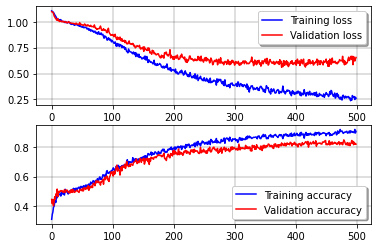

In [222]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

16/16 [==============================] - 0s 5ms/step


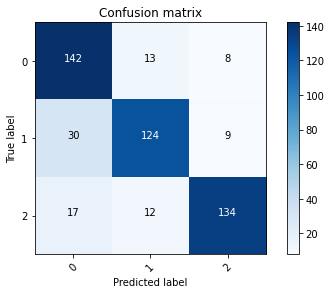

In [223]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [224]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

16/16 [==============================] - 0s 2ms/step
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


真實y值

In [225]:
print(yval[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


# 分類報告

In [226]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.8179959100204499

In [227]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.75      0.87      0.81       163
         BUY       0.83      0.76      0.79       163
        SELL       0.89      0.82      0.85       163

   micro avg       0.82      0.82      0.82       489
   macro avg       0.82      0.82      0.82       489
weighted avg       0.82      0.82      0.82       489
 samples avg       0.82      0.82      0.82       489



# plot error

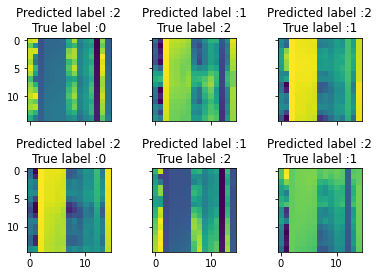

In [228]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [229]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

2/2 [==============================] - 0s 6ms/step
40


# 0~20筆

[*********************100%***********************]  1 of 1 completed


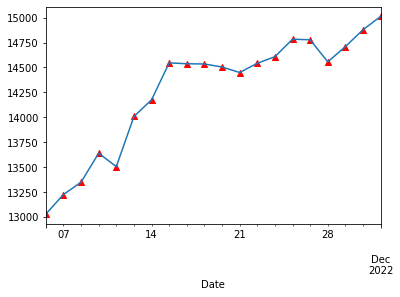

In [230]:
INDEX60 = df[-60:].index
#C = web.DataReader(SID,'yahoo',start="2000-01-01")[['Close']]
C = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)[['Close']]
C = C.loc[INDEX60,:]
C['SIGNAL'] = [np.nan for _ in range(20)] + answer #20個NAN+預測答案
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'][20:40].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 20~40筆

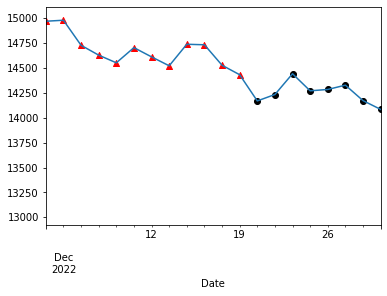

In [231]:
C['Close'][40:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 合併

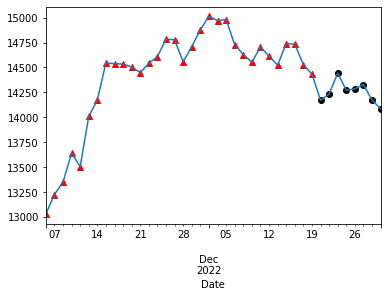

In [232]:
C['Close'][20:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 平滑版本

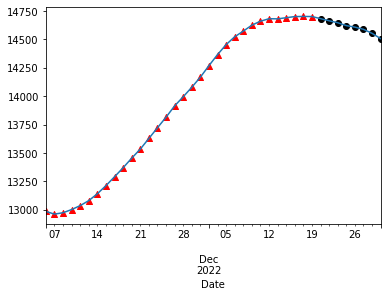

In [233]:
C_roll20 = pd.DataFrame(index=C.index)#空的dataframe index = 倒數60天股票日期
C_roll20['Close'] = C['Close'].rolling(20).mean()#收盤價做20天平滑
C_roll20['SIGNAL'] = C['SIGNAL']
buy = C_roll20[C_roll20['SIGNAL']==1]['Close']#買點
sell= C_roll20[C_roll20['SIGNAL']==2]['Close']#賣點
C_roll20['Close'][20:].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [234]:
C = C.dropna(axis=0)
C

,Close,SIGNAL
Date,,
2022-11-04,13026.7100,1.0000
2022-11-07,13223.7305,1.0000
2022-11-08,13347.7598,1.0000
2022-11-09,13638.8096,1.0000
2022-11-10,13503.7598,1.0000
2022-11-11,14007.5596,1.0000
2022-11-14,14174.9004,1.0000
2022-11-15,14546.3096,1.0000
2022-11-16,14537.3496,1.0000


In [235]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(5)

2/2 [==============================] - 0s 6ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2022-12-23,14271.6299,0.0059,0.2241,0.7700
2022-12-26,14285.1299,0.0046,0.0765,0.9190
2022-12-27,14328.4297,0.0032,0.0429,0.9539
2022-12-28,14173.0996,0.0003,0.0007,0.9990
2022-12-29,14085.0195,0.0017,0.0015,0.9968


In [236]:
def 勝率(df):
  t = []
  for i,idx in enumerate(df.index):
    訊號 = np.argmax(df.iloc[i,-3:])
    if 訊號 == 1:#buy
      try:
        點差 = df.iloc[i+1,0] - df.iloc[i,0]
        if 點差>0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 2:#sell
      try:
        點差 = df.iloc[i,0] - df.iloc[i+1,0]
        if 點差<0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 0:#hold
      pass
  return np.mean(t)
#C['Close'].shift()-C['Close'],len(C['Close'].shift()-C['Close'])
勝率(df)

0.6017191977077364

In [237]:
t = []
for i in range(len(C)):
  signal = np.argmax(C.iloc[i,-3:])
  if signal == 2:
    signal = -1
    t.append(signal)
  if signal == 1:
    signal = 1
    t.append(signal)
  if signal == 0:
    t.append(signal)
t,len(t)

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 40)

In [238]:
a = (C['Close'].shift()-C['Close']).values*t
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
賠率 = 1-勝率(df)
print(勝率(df),平均獲利,賠率,平均損失)
分子 = 勝率(df)*平均獲利
分母 =  賠率*平均損失*-1
print(分子,分母)
盈虧比 = (分子)/(分母)
盈虧比

0.6017191977077364 44.79845252403846 0.3982808022922636 -89.79617387820512
26.95608891131254 35.76409217498714


0.753719366884006

In [239]:
賠率

0.3982808022922636

# save model

In [240]:
model.save('Rikcy_net.h5')
del model

In [241]:
from keras.models import load_model
model = load_model('Rikcy_net.h5')
predict = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [242]:
predict[-5:]

array([[0.0058881 , 0.22408824, 0.7700237 ],
       [0.00455066, 0.07648963, 0.91895974],
       [0.0032003 , 0.04294736, 0.95385236],
       [0.00028606, 0.00073419, 0.99897975],
       [0.00168216, 0.00149804, 0.99681973]], dtype=float32)